Current working directory: a:\Python\Test\peru_test\pizaa

Available Excel files:
  Enhanced_pizza_sell_data_2024-25.xlsx

✅ Found file: Enhanced_pizza_sell_data_2024-25.xlsx
🍕 PREPARING PIZZA SALES DATA
✅ Data loaded: 1004 orders
📅 Date range: 2024-01-05 to 2026-07-07
🏪 Restaurants: 6
🍕 Pizza types: 12
🍕 PIZZA SALES ANALYSIS TOOL
🚀 STARTING COMPREHENSIVE PIZZA SALES ANALYSIS

🔍 BASIC DATA OVERVIEW
Dataset Shape: (1004, 31)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Order ID                      1004 non-null   object        
 1   Restaurant Name               1004 non-null   object        
 2   Location                      1004 non-null   object        
 3   Order Time                    1004 non-null   datetime64[ns]
 4   Delivery Time                 1004 non-null

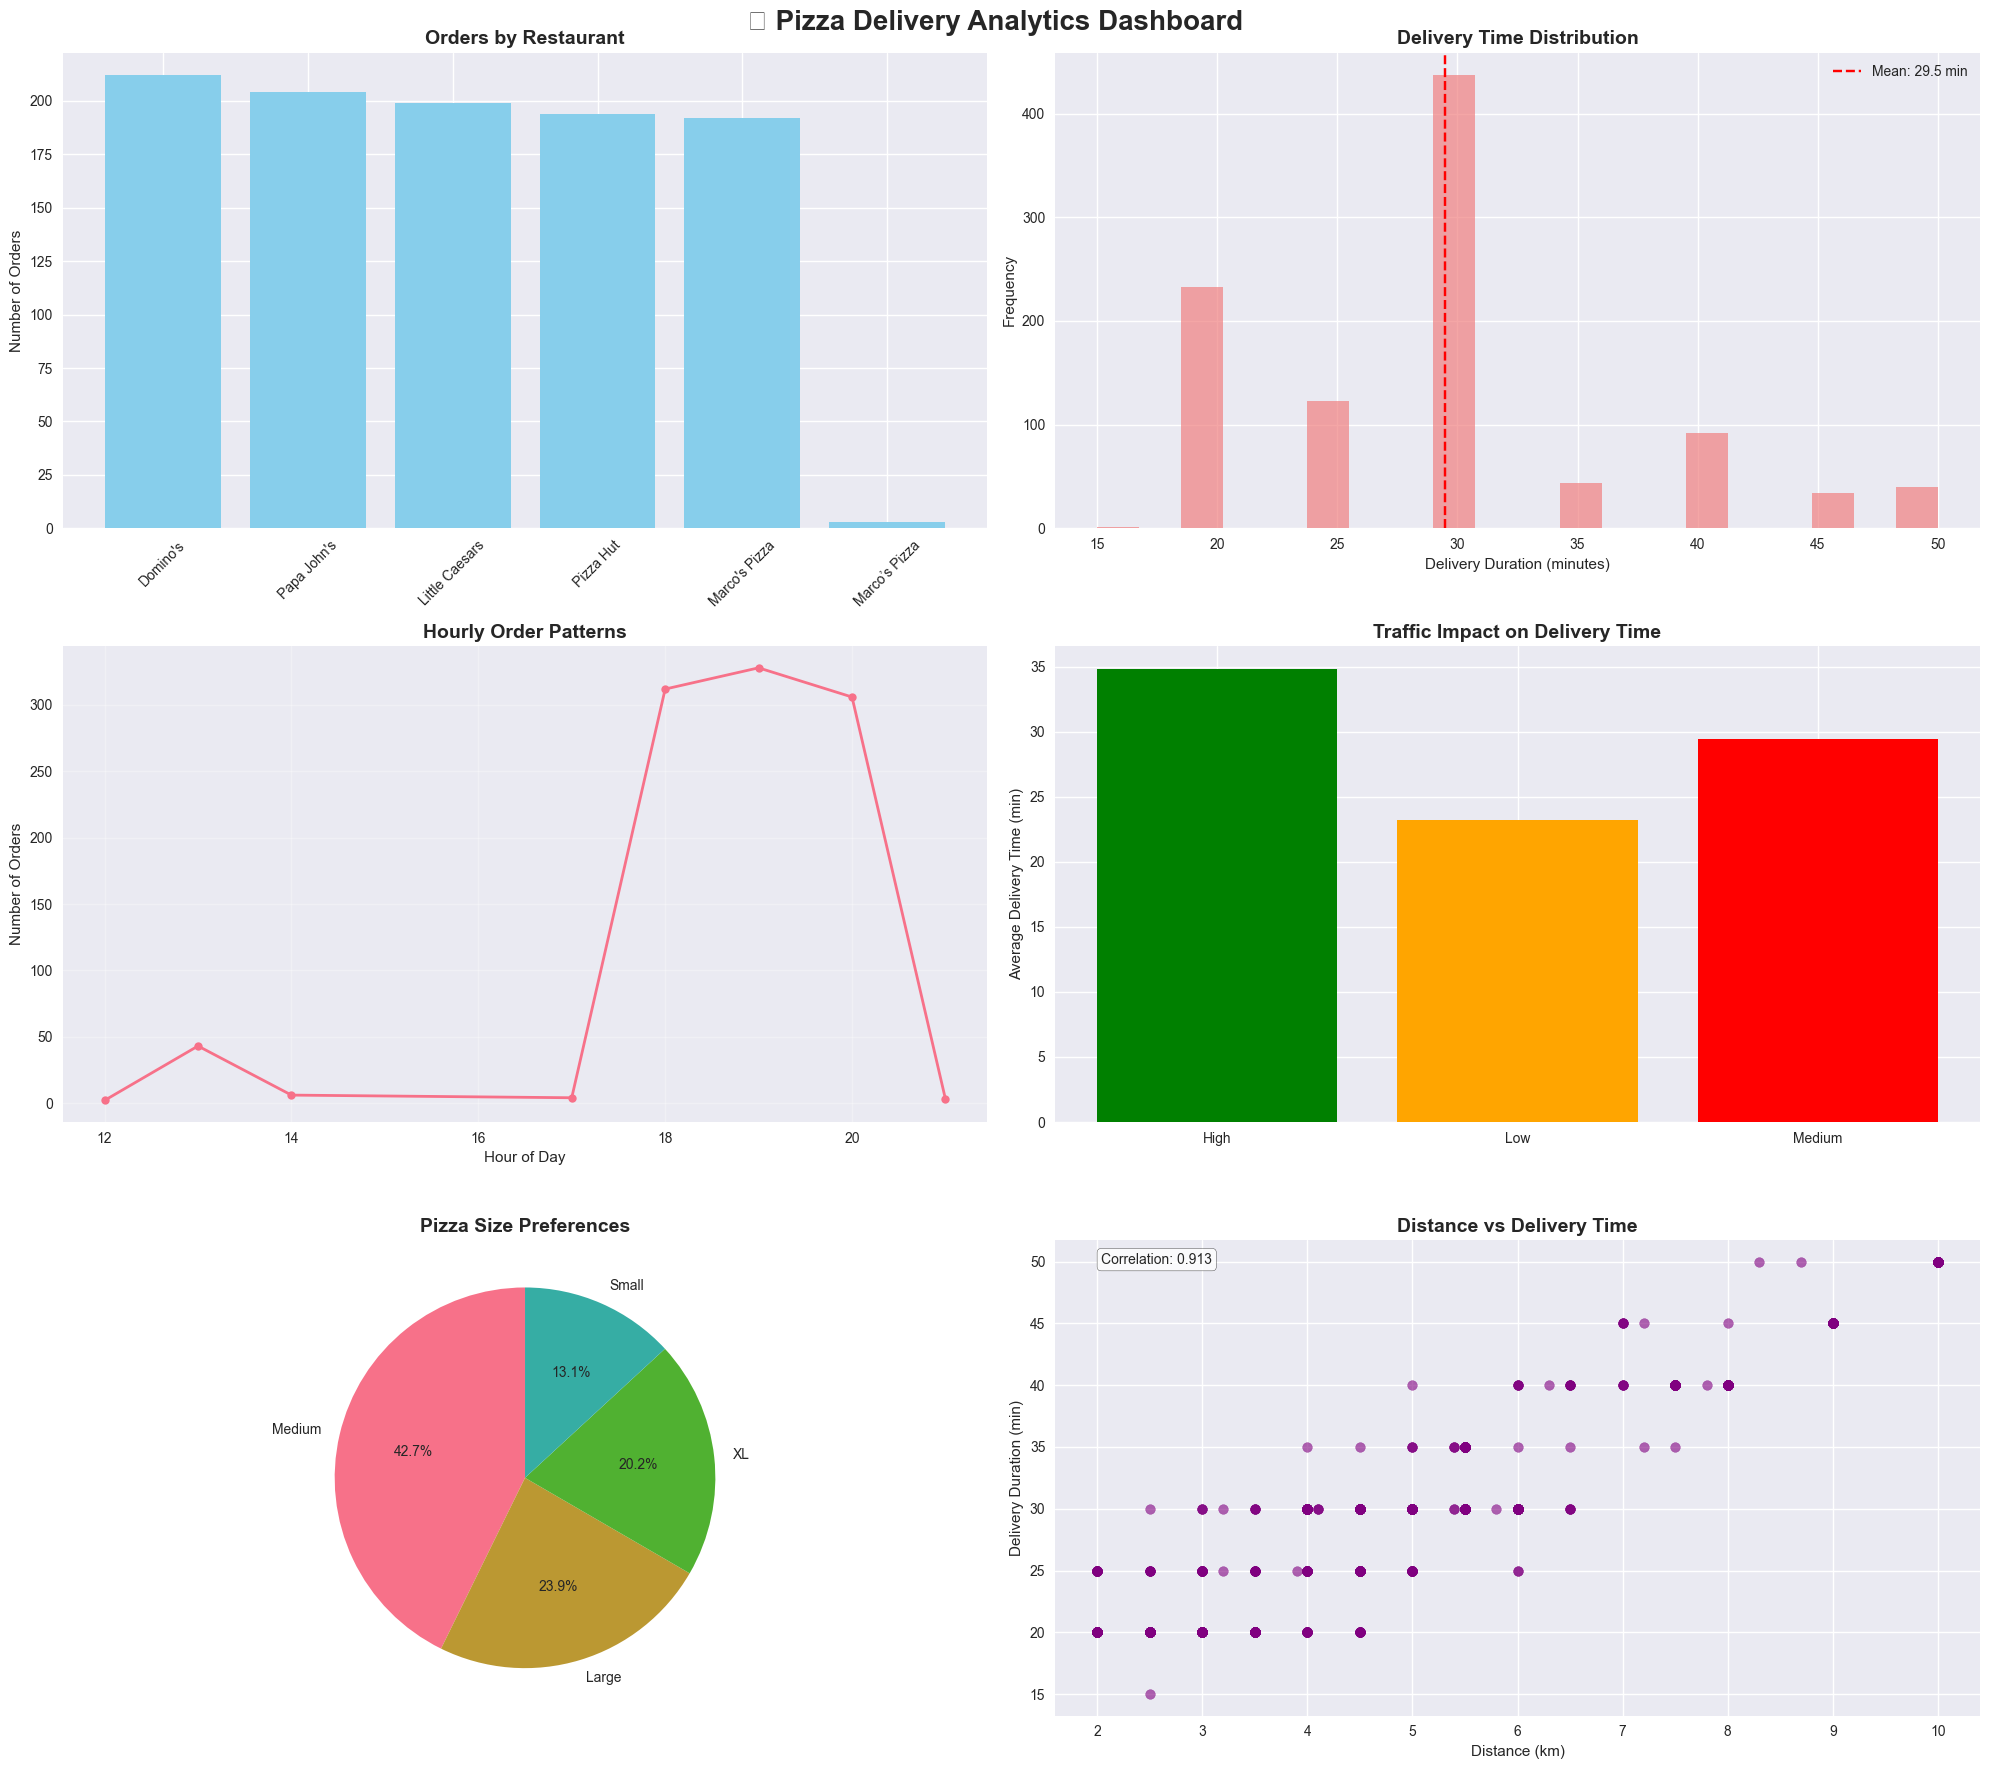

✅ Visualizations created successfully!

🎉 ANALYSIS COMPLETE!
Your comprehensive pizza sales analysis is ready!
Use the insights above to optimize your pizza delivery operations.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
import os
import random

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class PizzaSalesAnalyzer:
    def __init__(self, file_path):
        """Initialize the analyzer with pizza sales data"""
        self.df = pd.read_excel(file_path)
        self.prepare_data()
    
    def prepare_data(self):
        """Clean and prepare the data for analysis"""
        print("🍕 PREPARING PIZZA SALES DATA")
        print("=" * 50)
        
        # Check if datetime columns are already datetime objects or need conversion
        if not pd.api.types.is_datetime64_any_dtype(self.df['Order Time']):
            # Convert Excel date serial numbers to proper datetime
            excel_epoch = datetime(1899, 12, 30)  # Adjusted for Excel's leap year bug
            
            self.df['Order Time'] = pd.to_datetime(self.df['Order Time'].apply(
                lambda x: excel_epoch + timedelta(days=x) if pd.notnull(x) and isinstance(x, (int, float)) else x
            ))
        else:
            # Already datetime, just ensure it's the right type
            self.df['Order Time'] = pd.to_datetime(self.df['Order Time'])
        
        if not pd.api.types.is_datetime64_any_dtype(self.df['Delivery Time']):
            excel_epoch = datetime(1899, 12, 30)
            self.df['Delivery Time'] = pd.to_datetime(self.df['Delivery Time'].apply(
                lambda x: excel_epoch + timedelta(days=x) if pd.notnull(x) and isinstance(x, (int, float)) else x
            ))
        else:
            self.df['Delivery Time'] = pd.to_datetime(self.df['Delivery Time'])
        
        # Extract additional time features
        self.df['Order Date'] = self.df['Order Time'].dt.date
        self.df['Order Hour'] = self.df['Order Time'].dt.hour
        self.df['Day of Week'] = self.df['Order Time'].dt.day_name()
        self.df['Month'] = self.df['Order Time'].dt.month_name()
        self.df['Quarter'] = self.df['Order Time'].dt.quarter
        
        # Create efficiency metrics
        self.df['Delivery Speed'] = self.df['Distance (km)'] / (self.df['Delivery Duration (min)'] / 60)
        self.df['Delay Status'] = self.df['Delay (min)'].apply(lambda x: 'Delayed' if x > 15 else 'On Time')
        
        print(f"✅ Data loaded: {len(self.df)} orders")
        print(f"📅 Date range: {self.df['Order Time'].min().strftime('%Y-%m-%d')} to {self.df['Order Time'].max().strftime('%Y-%m-%d')}")
        print(f"🏪 Restaurants: {self.df['Restaurant Name'].nunique()}")
        print(f"🍕 Pizza types: {self.df['Pizza Type'].nunique()}")
            
    def basic_overview(self):
        """Provide basic overview of the dataset"""
        print("\n🔍 BASIC DATA OVERVIEW")
        print("=" * 50)
        
        print("Dataset Shape:", self.df.shape)
        print("\nColumn Information:")
        print(self.df.info())
        
        print("\nMissing Values:")
        missing = self.df.isnull().sum()
        if missing.sum() > 0:
            print(missing[missing > 0])
        else:
            print("No missing values found!")
            
        print(f"\nSummary Statistics:")
        print(self.df.describe())
        
    def sales_analysis(self):
        """Analyze sales patterns and trends"""
        print("\n📊 SALES ANALYSIS")
        print("=" * 50)
        
        # Overall metrics
        total_orders = len(self.df)
        avg_delivery_time = self.df['Delivery Duration (min)'].mean()
        avg_distance = self.df['Distance (km)'].mean()
        delay_rate = (self.df['Delay (min)'] > 15).mean() * 100
        
        print(f"📈 Total Orders: {total_orders:,}")
        print(f"⏰ Average Delivery Time: {avg_delivery_time:.1f} minutes")
        print(f"📍 Average Distance: {avg_distance:.1f} km")
        print(f"⚠️ Delay Rate: {delay_rate:.1f}%")
        
        # Restaurant performance
        print(f"\n🏪 RESTAURANT PERFORMANCE")
        print("-" * 30)
        restaurant_stats = self.df.groupby('Restaurant Name').agg({
            'Order ID': 'count',
            'Delivery Duration (min)': 'mean',
            'Delay (min)': 'mean',
            'Distance (km)': 'mean'
        }).round(2)
        restaurant_stats.columns = ['Orders', 'Avg Delivery Time', 'Avg Delay', 'Avg Distance']
        restaurant_stats = restaurant_stats.sort_values('Orders', ascending=False)
        print(restaurant_stats)
        
        # Pizza type analysis
        print(f"\n🍕 PIZZA TYPE ANALYSIS")
        print("-" * 25)
        pizza_stats = self.df.groupby('Pizza Type').agg({
            'Order ID': 'count',
            'Toppings Count': 'mean',
            'Delivery Duration (min)': 'mean'
        }).round(2)
        pizza_stats.columns = ['Orders', 'Avg Toppings', 'Avg Delivery Time']
        pizza_stats = pizza_stats.sort_values('Orders', ascending=False)
        print(pizza_stats)
        
    def time_series_analysis(self):
        """Analyze temporal patterns"""
        print("\n📅 TIME SERIES ANALYSIS")
        print("=" * 50)
        
        # Daily orders trend
        daily_orders = self.df.groupby('Order Date').size()
        print(f"📊 Daily Order Statistics:")
        print(f"   Average orders per day: {daily_orders.mean():.1f}")
        print(f"   Peak day orders: {daily_orders.max()}")
        print(f"   Minimum day orders: {daily_orders.min()}")
        
        # Hourly patterns
        print(f"\n⏰ HOURLY ORDER PATTERNS")
        print("-" * 25)
        hourly_orders = self.df.groupby('Order Hour').size()
        peak_hours = hourly_orders.nlargest(3)
        print("Top 3 peak hours:")
        for hour, count in peak_hours.items():
            period = "AM" if hour < 12 else "PM"
            display_hour = hour if hour <= 12 else hour - 12
            if display_hour == 0:
                display_hour = 12
            print(f"   {display_hour}:00 {period}: {count} orders")
        
        # Weekly patterns
        print(f"\n📅 WEEKLY PATTERNS")
        print("-" * 20)
        weekly_orders = self.df.groupby('Day of Week').size()
        # Reorder days properly
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        weekly_orders = weekly_orders.reindex(day_order)
        print(weekly_orders)
        
        # Monthly trends
        print(f"\n📈 MONTHLY TRENDS")
        print("-" * 18)
        monthly_orders = self.df.groupby('Month').size()
        print(monthly_orders)
        
    def delivery_performance_analysis(self):
        """Analyze delivery performance metrics"""
        print("\n🚚 DELIVERY PERFORMANCE ANALYSIS")
        print("=" * 50)
        
        # Traffic impact on delivery
        print("🚦 TRAFFIC IMPACT ON DELIVERY")
        print("-" * 30)
        traffic_impact = self.df.groupby('Traffic Level').agg({
            'Delivery Duration (min)': ['mean', 'std'],
            'Delay (min)': 'mean',
            'Delivery Efficiency (min/km)': 'mean'
        }).round(2)
        print(traffic_impact)
        
        # Distance vs delivery time correlation
        correlation = self.df['Distance (km)'].corr(self.df['Delivery Duration (min)'])
        print(f"\n📏 Distance-Delivery Time Correlation: {correlation:.3f}")
        
        # Peak hour analysis
        print(f"\n⏰ PEAK HOUR ANALYSIS")
        print("-" * 20)
        peak_analysis = self.df.groupby('Is Peak Hour').agg({
            'Delivery Duration (min)': 'mean',
            'Delay (min)': 'mean',
            'Order ID': 'count'
        }).round(2)
        peak_analysis.columns = ['Avg Delivery Time', 'Avg Delay', 'Order Count']
        print(peak_analysis)
        
        # Weekend vs weekday analysis
        print(f"\n📅 WEEKEND VS WEEKDAY")
        print("-" * 22)
        weekend_analysis = self.df.groupby('Is Weekend').agg({
            'Delivery Duration (min)': 'mean',
            'Delay (min)': 'mean',
            'Order ID': 'count'
        }).round(2)
        weekend_analysis.columns = ['Avg Delivery Time', 'Avg Delay', 'Order Count']
        print(weekend_analysis)
        
    def customer_behavior_analysis(self):
        """Analyze customer behavior patterns"""
        print("\n👥 CUSTOMER BEHAVIOR ANALYSIS")
        print("=" * 50)
        
        # Payment method preferences
        print("💳 PAYMENT METHOD PREFERENCES")
        print("-" * 30)
        payment_stats = self.df.groupby('Payment Method').agg({
            'Order ID': 'count',
            'Delivery Duration (min)': 'mean'
        }).round(2)
        payment_stats.columns = ['Orders', 'Avg Delivery Time']
        payment_stats['Percentage'] = (payment_stats['Orders'] / len(self.df) * 100).round(1)
        print(payment_stats.sort_values('Orders', ascending=False))
        
        # Pizza size preferences
        print(f"\n🍕 PIZZA SIZE PREFERENCES")
        print("-" * 25)
        size_stats = self.df.groupby('Pizza Size').agg({
            'Order ID': 'count',
            'Toppings Count': 'mean'
        }).round(2)
        size_stats.columns = ['Orders', 'Avg Toppings']
        size_stats['Percentage'] = (size_stats['Orders'] / len(self.df) * 100).round(1)
        print(size_stats.sort_values('Orders', ascending=False))
        
        # Topping analysis
        print(f"\n🧄 TOPPING ANALYSIS")
        print("-" * 18)
        topping_stats = self.df.groupby('Toppings Count').agg({
            'Order ID': 'count',
            'Delivery Duration (min)': 'mean',
            'Pizza Complexity': 'mean'
        }).round(2)
        topping_stats.columns = ['Orders', 'Avg Delivery Time', 'Avg Complexity']
        print(topping_stats)
        
    def advanced_analytics(self):
        """Perform advanced analytics and insights"""
        print("\n🔬 ADVANCED ANALYTICS")
        print("=" * 50)
        
        # Efficiency metrics by restaurant
        print("🏆 RESTAURANT EFFICIENCY RANKING")
        print("-" * 32)
        efficiency_metrics = self.df.groupby('Restaurant Name').agg({
            'Delivery Efficiency (min/km)': 'mean',
            'Delay (min)': 'mean',
            'Order ID': 'count'
        }).round(2)
        efficiency_metrics.columns = ['Efficiency Score', 'Avg Delay', 'Total Orders']
        # Lower efficiency score is better (less time per km)
        efficiency_metrics['Rank'] = efficiency_metrics['Efficiency Score'].rank()
        print(efficiency_metrics.sort_values('Rank'))
        
        # Complexity analysis
        print(f"\n🧩 PIZZA COMPLEXITY IMPACT")
        print("-" * 27)
        complexity_bins = pd.cut(self.df['Pizza Complexity'], bins=3, labels=['Low', 'Medium', 'High'])
        complexity_analysis = self.df.groupby(complexity_bins).agg({
            'Delivery Duration (min)': 'mean',
            'Delay (min)': 'mean',
            'Order ID': 'count'
        }).round(2)
        complexity_analysis.columns = ['Avg Delivery Time', 'Avg Delay', 'Order Count']
        print(complexity_analysis)
        
        # Location-based insights
        print(f"\n🌍 LOCATION-BASED INSIGHTS")
        print("-" * 25)
        # Extract city from location
        self.df['City'] = self.df['Location'].str.split(',').str[0]
        city_stats = self.df.groupby('City').agg({
            'Order ID': 'count',
            'Delivery Duration (min)': 'mean',
            'Distance (km)': 'mean'
        }).round(2)
        city_stats.columns = ['Orders', 'Avg Delivery Time', 'Avg Distance']
        print(city_stats.sort_values('Orders', ascending=False))
        
    def generate_recommendations(self):
        """Generate business recommendations based on analysis"""
        print("\n💡 BUSINESS RECOMMENDATIONS")
        print("=" * 50)
        
        # Find performance insights
        avg_delay = self.df['Delay (min)'].mean()
        high_delay_restaurants = self.df.groupby('Restaurant Name')['Delay (min)'].mean()
        worst_performer = high_delay_restaurants.idxmax()
        
        peak_hour_delays = self.df[self.df['Is Peak Hour'] == True]['Delay (min)'].mean()
        non_peak_delays = self.df[self.df['Is Peak Hour'] == False]['Delay (min)'].mean()
        
        print("🎯 KEY RECOMMENDATIONS:")
        print(f"1. OPTIMIZE PEAK HOURS: Peak hour delays ({peak_hour_delays:.1f} min) are significantly higher than non-peak ({non_peak_delays:.1f} min)")
        print(f"2. FOCUS ON {worst_performer.upper()}: This restaurant has the highest average delays ({high_delay_restaurants[worst_performer]:.1f} min)")
        
        # Traffic optimization
        high_traffic_delay = self.df[self.df['Traffic Level'] == 'High']['Delay (min)'].mean()
        print(f"3. TRAFFIC MANAGEMENT: High traffic conditions cause {high_traffic_delay:.1f} min average delays")
        
        # Distance optimization
        long_distance_orders = self.df[self.df['Distance (km)'] > self.df['Distance (km)'].quantile(0.75)]
        long_distance_delay = long_distance_orders['Delay (min)'].mean()
        print(f"4. DISTANCE STRATEGY: Long-distance orders (>75th percentile) have {long_distance_delay:.1f} min average delays")
        
        # Payment method insights
        fastest_payment = self.df.groupby('Payment Method')['Delivery Duration (min)'].mean().idxmin()
        print(f"5. PAYMENT OPTIMIZATION: {fastest_payment} payments have the fastest delivery times")
        
        print(f"\n📊 SUMMARY METRICS:")
        print(f"   • Overall customer satisfaction potential: {((self.df['Delay (min)'] <= 15).mean() * 100):.1f}% on-time deliveries")
        print(f"   • Average delivery efficiency: {self.df['Delivery Efficiency (min/km)'].mean():.2f} min/km")
        print(f"   • Peak performance opportunity: {len(self.df[self.df['Is Peak Hour'] == True])} peak hour orders to optimize")
        
    def create_visualizations(self):
        """Create comprehensive visualizations"""
        print("\n📈 CREATING VISUALIZATIONS")
        print("=" * 50)
        
        # Set up the plotting area
        fig, axes = plt.subplots(3, 2, figsize=(20, 18))
        fig.suptitle('🍕 Pizza Delivery Analytics Dashboard', fontsize=20, fontweight='bold')
        
        # 1. Orders by Restaurant
        restaurant_counts = self.df['Restaurant Name'].value_counts()
        axes[0, 0].bar(restaurant_counts.index, restaurant_counts.values, color='skyblue')
        axes[0, 0].set_title('Orders by Restaurant', fontsize=14, fontweight='bold')
        axes[0, 0].set_ylabel('Number of Orders')
        axes[0, 0].tick_params(axis='x', rotation=45)
        
        # 2. Delivery Time Distribution
        axes[0, 1].hist(self.df['Delivery Duration (min)'], bins=20, color='lightcoral', alpha=0.7)
        axes[0, 1].set_title('Delivery Time Distribution', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Delivery Duration (minutes)')
        axes[0, 1].set_ylabel('Frequency')
        axes[0, 1].axvline(self.df['Delivery Duration (min)'].mean(), color='red', linestyle='--', 
                          label=f'Mean: {self.df["Delivery Duration (min)"].mean():.1f} min')
        axes[0, 1].legend()
        
        # 3. Hourly Order Pattern
        hourly_orders = self.df.groupby('Order Hour').size()
        axes[1, 0].plot(hourly_orders.index, hourly_orders.values, marker='o', linewidth=2, markersize=6)
        axes[1, 0].set_title('Hourly Order Patterns', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Hour of Day')
        axes[1, 0].set_ylabel('Number of Orders')
        axes[1, 0].grid(True, alpha=0.3)
        
        # 4. Traffic Level Impact
        traffic_delivery = self.df.groupby('Traffic Level')['Delivery Duration (min)'].mean()
        axes[1, 1].bar(traffic_delivery.index, traffic_delivery.values, color=['green', 'orange', 'red'])
        axes[1, 1].set_title('Traffic Impact on Delivery Time', fontsize=14, fontweight='bold')
        axes[1, 1].set_ylabel('Average Delivery Time (min)')
        
        # 5. Pizza Size Preferences
        size_counts = self.df['Pizza Size'].value_counts()
        axes[2, 0].pie(size_counts.values, labels=size_counts.index, autopct='%1.1f%%', startangle=90)
        axes[2, 0].set_title('Pizza Size Preferences', fontsize=14, fontweight='bold')
        
        # 6. Distance vs Delivery Time Scatter
        axes[2, 1].scatter(self.df['Distance (km)'], self.df['Delivery Duration (min)'], alpha=0.6, color='purple')
        axes[2, 1].set_title('Distance vs Delivery Time', fontsize=14, fontweight='bold')
        axes[2, 1].set_xlabel('Distance (km)')
        axes[2, 1].set_ylabel('Delivery Duration (min)')
        
        # Add correlation coefficient
        corr = self.df['Distance (km)'].corr(self.df['Delivery Duration (min)'])
        axes[2, 1].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[2, 1].transAxes, 
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        plt.show()
        
        print("✅ Visualizations created successfully!")
        
    def run_complete_analysis(self):
        """Run the complete analysis pipeline"""
        print("🚀 STARTING COMPREHENSIVE PIZZA SALES ANALYSIS")
        print("=" * 60)
        
        self.basic_overview()
        self.sales_analysis()
        self.time_series_analysis()
        self.delivery_performance_analysis()
        self.customer_behavior_analysis()
        self.advanced_analytics()
        self.generate_recommendations()
        self.create_visualizations()
        
        print("\n🎉 ANALYSIS COMPLETE!")
        print("=" * 60)
        print("Your comprehensive pizza sales analysis is ready!")
        print("Use the insights above to optimize your pizza delivery operations.")

# Example usage:
if __name__ == "__main__":
    # Check current directory and available files
    print("Current working directory:", os.getcwd())
    print("\nAvailable Excel files:")
    excel_files = [f for f in os.listdir('.') if f.endswith(('.xlsx', '.xls'))]
    for f in excel_files:
        print(f"  {f}")
    
    # Try different possible file paths
    possible_paths = [
        'Enhanced_pizza_sell_data_202425.xlsx',
        'Enhanced_pizza_sell_data_2024-25.xlsx',
        'pizza_data.xlsx',
        'sample_pizza_data.xlsx'
    ]
    file_path = None
    for path in possible_paths:
        if os.path.exists(path):
            file_path = path
            print(f"\n✅ Found file: {file_path}")
            break
    
    if not file_path:
        print("\n❌ No pizza data file found. Creating sample data...")
        file_path = create_sample_data()
    
    # Initialize the analyzer
    try:
        analyzer = PizzaSalesAnalyzer(file_path)
        print("🍕 PIZZA SALES ANALYSIS TOOL")
        # Run complete analysis
        analyzer.run_complete_analysis()
    except Exception as e:
        print(f"❌ Error: {e}")
        print("Please check the file path and ensure the Excel file exists.")
    # analyzer = PizzaSalesAnalyzer('Enhanced_pizza_sell_data_202425.xlsx')
    
    # # Run complete analysis
    # analyzer.run_complete_analysis()
    
    # You can also run individual analyses:
    # analyzer.sales_analysis()
    # analyzer.time_series_analysis()
    # analyzer.delivery_performance_analysis()

🤖 PREPARING DATA FOR MACHINE LEARNING
✅ Data prepared for ML analysis
Dataset shape: (1004, 32)
🚀 STARTING MACHINE LEARNING ANALYSIS

⏰ DELIVERY TIME PREDICTION MODEL

Random Forest Results:
  Mean Absolute Error: 0.43 minutes
  Root Mean Square Error: 1.10 minutes
  R² Score: 0.982

Gradient Boosting Results:
  Mean Absolute Error: 0.66 minutes
  Root Mean Square Error: 1.28 minutes
  R² Score: 0.976

Linear Regression Results:
  Mean Absolute Error: 1.63 minutes
  Root Mean Square Error: 2.23 minutes
  R² Score: 0.927

🎯 TOP 10 MOST IMPORTANT FEATURES:
                    Feature  Importance
0             Distance (km)    0.877190
3          Pizza Complexity    0.029898
4                Order Hour    0.018394
1            Toppings Count    0.016533
9        Pizza Size_encoded    0.014797
8   Restaurant Name_encoded    0.009322
10       Pizza Type_encoded    0.008716
6                     Month    0.007822
12   Payment Method_encoded    0.006093
5               Day of Week    0.004366

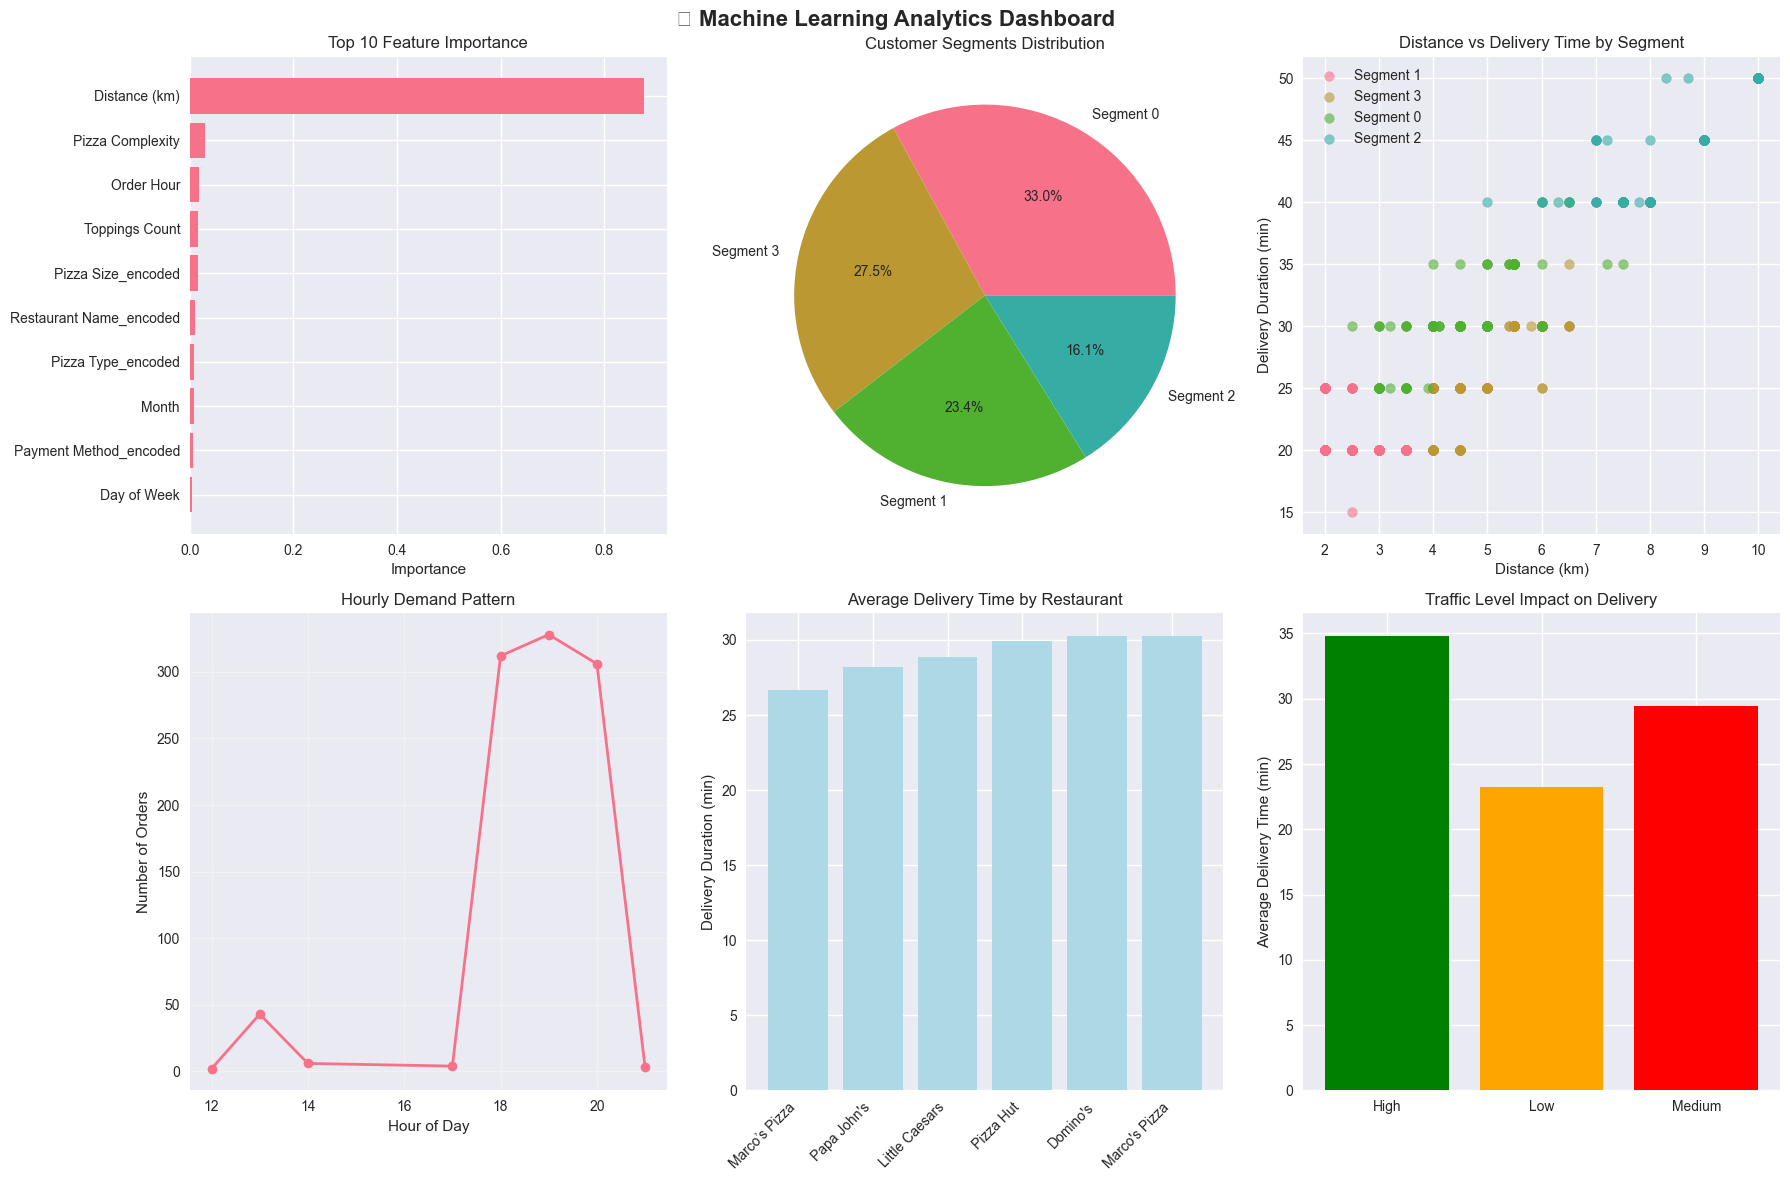

✅ ML visualizations created successfully!

🎉 MACHINE LEARNING ANALYSIS COMPLETE!

🛒 MARKET BASKET ANALYSIS
🔗 Pizza Type Correlations (Top 5 pairs):
   Sicilian ↔ Thin Crust: 0.999
   BBQ Chicken ↔ Gluten-Free: 0.994
   Margarita ↔ Thai Chicken: 0.986
   Cheese Burst ↔ Stuffed Crust: 0.974
   Deep Dish ↔ Gluten-Free: 0.925

🌟 SEASONAL ANALYSIS
📅 Monthly Order Distribution:

🗺️ DELIVERY ROUTE OPTIMIZATION
🎯 City Delivery Efficiency Ranking:
                Avg Distance  Order Count  Avg Delivery Time  Efficiency
City                                                                    
Fort Wayne              10.0            1               50.0         5.0
Henderson                8.0            1               40.0         5.0
Corpus Christi           6.0            1               30.0         5.0
Orlando                  9.0            2               45.0         5.0
Minneapolis              9.0            1               45.0         5.0
...                      ...          ...     

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

class PizzaMLAnalyzer:
    def __init__(self, file_path):
        """Initialize ML analyzer for pizza sales data"""
        self.df = pd.read_excel(file_path)
        self.prepare_ml_data()
        
    def prepare_ml_data(self):
        """Prepare data for machine learning"""
        print("🤖 PREPARING DATA FOR MACHINE LEARNING")
        print("=" * 50)
        
        # Check if datetime columns are already datetime objects or need conversion
        if not pd.api.types.is_datetime64_any_dtype(self.df['Order Time']):
            # Convert Excel date serial numbers to proper datetime
            from datetime import datetime, timedelta
            excel_epoch = datetime(1899, 12, 30)
            
            self.df['Order Time'] = pd.to_datetime(self.df['Order Time'].apply(
                lambda x: excel_epoch + timedelta(days=x) if pd.notnull(x) and isinstance(x, (int, float)) else x
            ))
        else:
            # Already datetime, just ensure it's the right type
            self.df['Order Time'] = pd.to_datetime(self.df['Order Time'])
        
        # Feature engineering
        self.df['Order Hour'] = self.df['Order Time'].dt.hour
        self.df['Day of Week'] = self.df['Order Time'].dt.dayofweek
        self.df['Month'] = self.df['Order Time'].dt.month
        self.df['Is Weekend'] = self.df['Day of Week'].isin([5, 6]).astype(int)
        
        # Encode categorical variables
        self.label_encoders = {}
        categorical_columns = ['Restaurant Name', 'Pizza Size', 'Pizza Type', 'Traffic Level', 'Payment Method']
        
        for col in categorical_columns:
            le = LabelEncoder()
            self.df[f'{col}_encoded'] = le.fit_transform(self.df[col])
            self.label_encoders[col] = le
            
        print("✅ Data prepared for ML analysis")
        print(f"Dataset shape: {self.df.shape}")
        
    def delivery_time_prediction(self):
        """Build model to predict delivery time"""
        print("\n⏰ DELIVERY TIME PREDICTION MODEL")
        print("=" * 40)
        
        # Select features for prediction
        feature_columns = [
            'Distance (km)', 'Toppings Count', 'Traffic Impact', 'Pizza Complexity',
            'Order Hour', 'Day of Week', 'Month', 'Is Weekend',
            'Restaurant Name_encoded', 'Pizza Size_encoded', 'Pizza Type_encoded',
            'Traffic Level_encoded', 'Payment Method_encoded'
        ]
        
        X = self.df[feature_columns].fillna(0)
        y = self.df['Delivery Duration (min)']
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Train multiple models
        models = {
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingRegressor(random_state=42),
            'Linear Regression': LinearRegression()
        }
        
        results = {}
        
        for name, model in models.items():
            # Train model
            model.fit(X_train, y_train)
            
            # Make predictions
            y_pred = model.predict(X_test)
            
            # Calculate metrics
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            results[name] = {
                'MAE': mae,
                'RMSE': np.sqrt(mse),
                'R²': r2,
                'Model': model
            }
            
            print(f"\n{name} Results:")
            print(f"  Mean Absolute Error: {mae:.2f} minutes")
            print(f"  Root Mean Square Error: {np.sqrt(mse):.2f} minutes")
            print(f"  R² Score: {r2:.3f}")
        
        # Feature importance for best model (Random Forest)
        best_model = results['Random Forest']['Model']
        feature_importance = pd.DataFrame({
            'Feature': feature_columns,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print(f"\n🎯 TOP 10 MOST IMPORTANT FEATURES:")
        print(feature_importance.head(10))
        
        # Store best model for later use
        self.delivery_model = best_model
        self.feature_columns = feature_columns
        
        return results
    
    def demand_forecasting(self):
        """Forecast pizza demand patterns"""
        print("\n📊 DEMAND FORECASTING ANALYSIS")
        print("=" * 40)
        
        # Aggregate daily orders
        daily_orders = self.df.groupby(self.df['Order Time'].dt.date).size().reset_index()
        daily_orders.columns = ['Date', 'Orders']
        daily_orders['Date'] = pd.to_datetime(daily_orders['Date'])
        daily_orders = daily_orders.sort_values('Date')
        
        # Create time series features
        daily_orders['DayOfWeek'] = daily_orders['Date'].dt.dayofweek
        daily_orders['Month'] = daily_orders['Date'].dt.month
        daily_orders['DayOfMonth'] = daily_orders['Date'].dt.day
        daily_orders['IsWeekend'] = daily_orders['DayOfWeek'].isin([5, 6]).astype(int)
        
        # Simple moving average forecasting
        daily_orders['MA_7'] = daily_orders['Orders'].rolling(window=7).mean()
        daily_orders['MA_14'] = daily_orders['Orders'].rolling(window=14).mean()
        
        # Trend analysis - fixed to work with Series indexing
        daily_orders['Trend'] = daily_orders['Orders'].rolling(window=7).apply(
            lambda x: (x.iloc[-1] - x.iloc[0]) / len(x) if len(x) > 1 else 0, raw=False
        )
        
        print(f"📈 DEMAND INSIGHTS:")
        print(f"   Average daily orders: {daily_orders['Orders'].mean():.1f}")
        print(f"   Peak day orders: {daily_orders['Orders'].max()}")
        print(f"   Minimum day orders: {daily_orders['Orders'].min()}")
        print(f"   Standard deviation: {daily_orders['Orders'].std():.1f}")
        
        # Weekly patterns
        weekly_pattern = daily_orders.groupby('DayOfWeek')['Orders'].mean()
        days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        
        print(f"\n📅 WEEKLY DEMAND PATTERN:")
        for i, day in enumerate(days):
            if i < len(weekly_pattern):
                print(f"   {day}: {weekly_pattern.iloc[i]:.1f} orders")
        
        # Monthly patterns
        monthly_pattern = daily_orders.groupby('Month')['Orders'].mean()
        months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        
        print(f"\n📊 MONTHLY DEMAND PATTERN:")
        for i in range(len(monthly_pattern)):
            month_idx = monthly_pattern.index[i] - 1
            if month_idx < len(months):
                print(f"   {months[month_idx]}: {monthly_pattern.iloc[i]:.1f} orders")
        
        return daily_orders
    
    def customer_segmentation(self):
        """Perform customer segmentation analysis"""
        print("\n👥 CUSTOMER SEGMENTATION ANALYSIS")
        print("=" * 40)
        
        # Create customer behavior features
        # Note: Since we don't have customer IDs, we'll segment based on order characteristics
        order_features = self.df[['Distance (km)', 'Toppings Count', 'Pizza Complexity', 
                                 'Delivery Duration (min)', 'Delay (min)']].fillna(0)
        
        # Standardize features
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(order_features)
        
        # Perform K-means clustering
        n_clusters = 4
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(scaled_features)
        
        # Add cluster labels to dataframe
        self.df['Customer_Segment'] = clusters
        
        # Analyze segments
        segment_analysis = self.df.groupby('Customer_Segment').agg({
            'Distance (km)': 'mean',
            'Toppings Count': 'mean',
            'Pizza Complexity': 'mean',
            'Delivery Duration (min)': 'mean',
            'Delay (min)': 'mean',
            'Order ID': 'count'
        }).round(2)
        
        segment_analysis.columns = ['Avg Distance', 'Avg Toppings', 'Avg Complexity', 
                                  'Avg Delivery Time', 'Avg Delay', 'Order Count']
        
        # Name segments based on characteristics
        segment_names = []
        for i in range(n_clusters):
            row = segment_analysis.loc[i]
            if row['Avg Distance'] > segment_analysis['Avg Distance'].mean():
                if row['Avg Complexity'] > segment_analysis['Avg Complexity'].mean():
                    segment_names.append('Premium Long-Distance')
                else:
                    segment_names.append('Standard Long-Distance')
            else:
                if row['Avg Complexity'] > segment_analysis['Avg Complexity'].mean():
                    segment_names.append('Premium Local')
                else:
                    segment_names.append('Standard Local')
        
        segment_analysis['Segment_Name'] = segment_names
        
        print("🎯 CUSTOMER SEGMENTS IDENTIFIED:")
        print(segment_analysis)
        
        # Pizza type preferences by segment
        print(f"\n🍕 PIZZA PREFERENCES BY SEGMENT:")
        for i in range(n_clusters):
            segment_data = self.df[self.df['Customer_Segment'] == i]
            top_pizzas = segment_data['Pizza Type'].value_counts().head(3)
            print(f"\n{segment_names[i]} Customers:")
            for pizza, count in top_pizzas.items():
                percentage = (count / len(segment_data)) * 100
                print(f"   {pizza}: {count} orders ({percentage:.1f}%)")
        
        return segment_analysis
    
    def optimization_recommendations(self):
        """Generate optimization recommendations using ML insights"""
        print("\n🎯 ML-BASED OPTIMIZATION RECOMMENDATIONS")
        print("=" * 50)
        
        # Identify optimal delivery conditions
        optimal_conditions = self.df[
            (self.df['Delivery Duration (min)'] <= self.df['Delivery Duration (min)'].quantile(0.25)) &
            (self.df['Delay (min)'] <= self.df['Delay (min)'].quantile(0.25))
        ]
        
        print("⚡ OPTIMAL DELIVERY CONDITIONS:")
        print(f"   Traffic Level: {optimal_conditions['Traffic Level'].mode().iloc[0]}")
        print(f"   Average Distance: {optimal_conditions['Distance (km)'].mean():.1f} km")
        print(f"   Most Common Hour: {optimal_conditions['Order Hour'].mode().iloc[0]}:00")
        print(f"   Weekend Orders: {(optimal_conditions['Is Weekend'].sum() / len(optimal_conditions) * 100):.1f}%")
        
        # Restaurant efficiency analysis
        restaurant_efficiency = self.df.groupby('Restaurant Name').agg({
            'Delivery Duration (min)': 'mean',
            'Delay (min)': 'mean',
            'Order ID': 'count'
        }).round(2)
        
        best_restaurant = restaurant_efficiency['Delivery Duration (min)'].idxmin()
        worst_restaurant = restaurant_efficiency['Delivery Duration (min)'].idxmax()
        
        print(f"\n🏆 RESTAURANT PERFORMANCE:")
        print(f"   Best Performer: {best_restaurant}")
        print(f"   Worst Performer: {worst_restaurant}")
        print(f"   Improvement Potential: {restaurant_efficiency.loc[worst_restaurant, 'Delivery Duration (min)'] - restaurant_efficiency.loc[best_restaurant, 'Delivery Duration (min)']:.1f} minutes")
        
        # Peak hour optimization
        peak_vs_nonpeak = self.df.groupby('Is Peak Hour').agg({
            'Delivery Duration (min)': 'mean',
            'Order ID': 'count'
        })
        
        if True in peak_vs_nonpeak.index and False in peak_vs_nonpeak.index:
            peak_penalty = peak_vs_nonpeak.loc[True, 'Delivery Duration (min)'] - peak_vs_nonpeak.loc[False, 'Delivery Duration (min)']
            print(f"\n⏰ PEAK HOUR IMPACT:")
            print(f"   Peak hour penalty: {peak_penalty:.1f} minutes")
            print(f"   Peak hour orders: {peak_vs_nonpeak.loc[True, 'Order ID']} ({peak_vs_nonpeak.loc[True, 'Order ID'] / len(self.df) * 100:.1f}%)")
        
        # Delivery zone optimization
        self.df['Distance_Category'] = pd.cut(self.df['Distance (km)'], 
                                            bins=[0, 3, 6, float('inf')], 
                                            labels=['Near', 'Medium', 'Far'])
        
        distance_analysis = self.df.groupby('Distance_Category').agg({
            'Delivery Duration (min)': 'mean',
            'Delay (min)': 'mean',
            'Order ID': 'count'
        }).round(2)
        
        print(f"\n📍 DELIVERY ZONE ANALYSIS:")
        print(distance_analysis)
        
    def create_ml_visualizations(self):
        """Create ML-specific visualizations"""
        print("\n📊 CREATING ML VISUALIZATIONS")
        print("=" * 40)
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('🤖 Machine Learning Analytics Dashboard', fontsize=16, fontweight='bold')
        
        # 1. Feature Importance (if model exists)
        if hasattr(self, 'delivery_model'):
            feature_importance = pd.DataFrame({
                'Feature': self.feature_columns,
                'Importance': self.delivery_model.feature_importances_
            }).sort_values('Importance', ascending=True).tail(10)
            
            axes[0, 0].barh(feature_importance['Feature'], feature_importance['Importance'])
            axes[0, 0].set_title('Top 10 Feature Importance')
            axes[0, 0].set_xlabel('Importance')
        
        # 2. Customer Segments
        if 'Customer_Segment' in self.df.columns:
            segment_counts = self.df['Customer_Segment'].value_counts()
            axes[0, 1].pie(segment_counts.values, labels=[f'Segment {i}' for i in segment_counts.index], 
                          autopct='%1.1f%%')
            axes[0, 1].set_title('Customer Segments Distribution')
        
        # 3. Delivery Duration vs Distance by Segment
        if 'Customer_Segment' in self.df.columns:
            for segment in self.df['Customer_Segment'].unique():
                segment_data = self.df[self.df['Customer_Segment'] == segment]
                axes[0, 2].scatter(segment_data['Distance (km)'], segment_data['Delivery Duration (min)'], 
                                 label=f'Segment {segment}', alpha=0.6)
            axes[0, 2].set_xlabel('Distance (km)')
            axes[0, 2].set_ylabel('Delivery Duration (min)')
            axes[0, 2].set_title('Distance vs Delivery Time by Segment')
            axes[0, 2].legend()
        
        # 4. Hourly Demand Pattern
        hourly_orders = self.df.groupby('Order Hour').size()
        axes[1, 0].plot(hourly_orders.index, hourly_orders.values, marker='o', linewidth=2)
        axes[1, 0].set_title('Hourly Demand Pattern')
        axes[1, 0].set_xlabel('Hour of Day')
        axes[1, 0].set_ylabel('Number of Orders')
        axes[1, 0].grid(True, alpha=0.3)
        
        # 5. Restaurant Performance Comparison
        restaurant_perf = self.df.groupby('Restaurant Name')['Delivery Duration (min)'].mean().sort_values()
        axes[1, 1].bar(range(len(restaurant_perf)), restaurant_perf.values, color='lightblue')
        axes[1, 1].set_xticks(range(len(restaurant_perf)))
        axes[1, 1].set_xticklabels(restaurant_perf.index, rotation=45, ha='right')
        axes[1, 1].set_title('Average Delivery Time by Restaurant')
        axes[1, 1].set_ylabel('Delivery Duration (min)')
        
        # 6. Traffic Level Impact
        traffic_impact = self.df.groupby('Traffic Level')['Delivery Duration (min)'].mean()
        colors = ['green', 'orange', 'red']
        axes[1, 2].bar(traffic_impact.index, traffic_impact.values, color=colors)
        axes[1, 2].set_title('Traffic Level Impact on Delivery')
        axes[1, 2].set_ylabel('Average Delivery Time (min)')
        
        plt.tight_layout()
        plt.show()
        
        print("✅ ML visualizations created successfully!")
    
    def run_complete_ml_analysis(self):
        """Run complete machine learning analysis"""
        print("🚀 STARTING MACHINE LEARNING ANALYSIS")
        print("=" * 60)
        
        # Run all ML analyses
        self.delivery_time_prediction()
        self.demand_forecasting()
        self.customer_segmentation()
        self.optimization_recommendations()
        self.create_ml_visualizations()
        
        print("\n🎉 MACHINE LEARNING ANALYSIS COMPLETE!")
        print("=" * 60)

# Additional utility functions for advanced analytics
class PizzaAdvancedAnalytics:
    """Advanced analytics for pizza delivery operations"""
    
    @staticmethod
    def market_basket_analysis(df):
        """Analyze pizza type combinations and preferences"""
        print("\n🛒 MARKET BASKET ANALYSIS")
        print("=" * 30)
        
        # Analyze pizza type co-occurrence patterns
        pizza_combinations = df.groupby(['Restaurant Name', 'Pizza Type']).size().unstack(fill_value=0)
        
        # Calculate correlation between pizza types
        pizza_correlation = pizza_combinations.corr()
        
        print("🔗 Pizza Type Correlations (Top 5 pairs):")
        correlations = []
        for i in range(len(pizza_correlation.columns)):
            for j in range(i+1, len(pizza_correlation.columns)):
                corr_value = pizza_correlation.iloc[i, j]
                if not np.isnan(corr_value):
                    correlations.append((
                        pizza_correlation.columns[i],
                        pizza_correlation.columns[j],
                        corr_value
                    ))
        
        correlations.sort(key=lambda x: abs(x[2]), reverse=True)
        for pizza1, pizza2, corr in correlations[:5]:
            print(f"   {pizza1} ↔ {pizza2}: {corr:.3f}")
    
    @staticmethod
    def seasonal_analysis(df):
        """Analyze seasonal patterns in pizza orders"""
        print("\n🌟 SEASONAL ANALYSIS")
        print("=" * 25)
        
        # Convert month names to numbers for proper ordering
        month_map = {
            'January': 1, 'February': 2, 'March': 3, 'April': 4,
            'May': 5, 'June': 6, 'July': 7, 'August': 8,
            'September': 9, 'October': 10, 'November': 11, 'December': 12
        }
        
        # Check if Month column exists, if not create it from Order Time
        if 'Month' not in df.columns and 'Order Time' in df.columns:
            df['Month'] = df['Order Time'].dt.month_name()
        
        if 'Month' in df.columns:
            df['Month_Num'] = df['Month'].map(month_map)
            seasonal_orders = df.groupby('Month_Num').size()
            
            print("📅 Monthly Order Distribution:")
            for month_num, count in seasonal_orders.items():
                month_name = [k for k, v in month_map.items() if v == month_num][0]
                print(f"   {month_name}: {count} orders")
        else:
            print("No month data available for seasonal analysis")
    
    @staticmethod
    def delivery_route_optimization(df):
        """Analyze delivery routes and suggest optimizations"""
        print("\n🗺️ DELIVERY ROUTE OPTIMIZATION")
        print("=" * 35)
        
        # Extract city information
        df['City'] = df['Location'].str.split(',').str[0].str.strip()
        
        # Analyze delivery efficiency by city
        city_analysis = df.groupby('City').agg({
            'Distance (km)': ['mean', 'count'],
            'Delivery Duration (min)': 'mean',
            'Delivery Efficiency (min/km)': 'mean'
        }).round(2)
        
        city_analysis.columns = ['Avg Distance', 'Order Count', 'Avg Delivery Time', 'Efficiency']
        city_analysis = city_analysis.sort_values('Efficiency')
        
        print("🎯 City Delivery Efficiency Ranking:")
        print(city_analysis)
        
        # Identify optimization opportunities
        inefficient_cities = city_analysis[city_analysis['Efficiency'] > city_analysis['Efficiency'].mean()]
        print(f"\n⚠️ Cities needing route optimization:")
        for city in inefficient_cities.index:
            print(f"   {city}: {inefficient_cities.loc[city, 'Efficiency']:.2f} min/km efficiency")

# Example usage
if __name__ == "__main__":
    # Use the correct filename with hyphens
    ml_analyzer = PizzaMLAnalyzer('Enhanced_pizza_sell_data_2024-25.xlsx')
    
    # Run complete ML analysis
    ml_analyzer.run_complete_ml_analysis()
    
    # Run advanced analytics
    advanced = PizzaAdvancedAnalytics()
    advanced.market_basket_analysis(ml_analyzer.df)
    advanced.seasonal_analysis(ml_analyzer.df)
    advanced.delivery_route_optimization(ml_analyzer.df)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.offline as pyo
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Optional: For Jupyter Notebook offline plotting
# pyo.init_notebook_mode(connected=True)

class PizzaDashboard:
    """Interactive Dashboard for Pizza Delivery Analytics"""
    
    def __init__(self, file_path):
        """Initialize dashboard with pizza sales data"""
        self.df = pd.read_excel(file_path)
        
        # Styling defaults
        self.plot_template = 'plotly_white'  # Clean template
        self.font_settings = dict(family="Arial, sans-serif", size=12, color="#333333")
        self.color_palette = px.colors.qualitative.Plotly 
        self.sequential_color_palette = px.colors.sequential.Blues_r # Using a reversed Blues scale for some visuals
        self.pie_colors = px.colors.diverging.Spectral_r

        self.prepare_dashboard_data()
        
    def prepare_dashboard_data(self):
        """Prepare data for dashboard visualizations"""
        print("📊 PREPARING INTERACTIVE DASHBOARD")
        print("=" * 40)
        
        # Convert time columns to datetime objects
        excel_epoch = datetime(1899, 12, 30)
        time_cols = ['Order Time', 'Delivery Time']

        for col in time_cols:
            if not pd.api.types.is_datetime64_any_dtype(self.df[col]):
                # Attempt conversion from Excel serial number or string time
                def convert_time(x):
                    if pd.notnull(x):
                        if isinstance(x, (int, float)): # Excel serial number for datetime
                            return excel_epoch + timedelta(days=x)
                        if isinstance(x, str): # Time string e.g. "HH:MM:SS"
                            try:
                                return pd.to_datetime(x, format='%H:%M:%S').time() # store as time object first
                            except ValueError:
                                return pd.to_datetime(x).time() # try generic parse
                        if isinstance(x, datetime.time): # Already a time object
                             return x
                    return pd.NaT

                self.df[col] = self.df[col].apply(convert_time)
                # If 'Order Date' column exists and 'Order Time' is just time, combine them
                # For this example, we assume 'Order Time' needs a default date if it's just time.
                # If 'Order Time' is only time, pd.to_datetime assigns today's date.
                # This needs careful handling based on actual data.
                # For now, let's assume if it's a time object, we'll combine with a fixed date or it's relative.
                # A common scenario: if 'Order Date' is a separate column in excel, it should be combined.
                # Here, we'll create a dummy date if it's just time, assuming all orders are on "today".
                # This is a placeholder: ideally, your data has full datetime stamps or separate date columns.
                if pd.api.types.is_datetime64_any_dtype(self.df['Order Date'] if 'Order Date' in self.df.columns else None):
                     self.df[col] = self.df.apply(
                        lambda row: datetime.combine(row['Order Date'], row[col]) if isinstance(row[col], datetime.time) else pd.to_datetime(row[col]),
                        axis=1
                    )
                else: # If no Order Date column, and it's time, make it today's date + time
                    self.df[col] = self.df[col].apply(
                        lambda t: datetime.combine(datetime.today(), t) if isinstance(t, datetime.time) else pd.to_datetime(t)
                    )
            else: # Already datetime
                 self.df[col] = pd.to_datetime(self.df[col])
        
        # Additional features
        self.df['Order Date'] = self.df['Order Time'].dt.date
        self.df['Order Hour'] = self.df['Order Time'].dt.hour
        self.df['Day of Week'] = self.df['Order Time'].dt.day_name()
        self.df['Month'] = self.df['Order Time'].dt.month_name()
        self.df['City'] = self.df['Location'].str.split(',').str[0].str.strip()
        
        # Performance metrics
        self.df['On Time'] = (self.df['Delay (min)'] <= 15).astype(int) # 15 min threshold

        self.df['Delivery Speed (km/h)'] = np.where(
            self.df['Delivery Duration (min)'] > 0,
            self.df['Distance (km)'] / (self.df['Delivery Duration (min)'] / 60),
            0 
        )
        self.df['Delivery Speed (km/h)'].replace([np.inf, -np.inf], 0, inplace=True)

        self.df['Delivery Efficiency (min/km)'] = np.where(
            self.df['Distance (km)'] > 0,
            self.df['Delivery Duration (min)'] / self.df['Distance (km)'],
            np.nan 
        )
        self.df['Delivery Efficiency (min/km)'].replace([np.inf, -np.inf], np.nan, inplace=True)
        
        # Is Peak Hour (e.g., 11 AM - 1 PM lunch, 6 PM - 8 PM dinner)
        peak_hours_lunch = (self.df['Order Hour'] >= 11) & (self.df['Order Hour'] <= 13)
        peak_hours_dinner = (self.df['Order Hour'] >= 18) & (self.df['Order Hour'] <= 20)
        self.df['Is Peak Hour'] = peak_hours_lunch | peak_hours_dinner
        
        print("✅ Dashboard data prepared")
        print(f"📈 Ready to create interactive visualizations for {len(self.df)} orders")

    def _apply_common_layout(self, fig, title_text, height=None, showlegend=False):
        """Apply common layout settings to a figure."""
        layout_args = dict(
            title_text=title_text,
            title_x=0.5,
            title_font_size=24,
            font=self.font_settings,
            template=self.plot_template,
            showlegend=showlegend,
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
            margin=dict(l=70, r=40, t=100, b=70) # Left, Right, Top, Bottom
        )
        if height:
            layout_args['height'] = height
        fig.update_layout(**layout_args)
        fig.update_annotations(font_size=14) # Subplot titles
        
    def create_executive_dashboard(self):
        print("\n👨‍💼 CREATING EXECUTIVE DASHBOARD")
        print("=" * 35)
        
        fig = make_subplots(
            rows=3, cols=2,
            subplot_titles=(
                'Daily Orders & Avg Delivery Time', 'Top Restaurants by Orders',
                'Delivery Duration Distribution', 'Peak Hours - Order Volume',
                'Top Pizza Types by Orders', 'Order Distribution by City'
            ),
            specs=[[{"secondary_y": True}, {}],
                   [{}, {}],
                   [{}, {"type": "domain"}]]
        )
        
        # 1. Daily Order Trends
        daily_orders = self.df.groupby('Order Date').agg(
            Total_Orders=('Order ID', 'count'),
            Avg_Delivery_Duration=('Delivery Duration (min)', 'mean')
        ).reset_index()
        daily_orders['Order Date'] = pd.to_datetime(daily_orders['Order Date']) # Ensure datetime
        
        fig.add_trace(
            go.Scatter(x=daily_orders['Order Date'], y=daily_orders['Total_Orders'],
                       mode='lines+markers', name='Daily Orders',
                       line=dict(color=self.color_palette[0], width=2),
                       hovertemplate="<b>Date:</b> %{x|%Y-%m-%d}<br><b>Orders:</b> %{y}<extra></extra>"),
            row=1, col=1, secondary_y=False
        )
        fig.add_trace(
            go.Scatter(x=daily_orders['Order Date'], y=daily_orders['Avg_Delivery_Duration'],
                       mode='lines', name='Avg Delivery Time',
                       line=dict(color=self.color_palette[1], width=2, dash='dash'),
                       hovertemplate="<b>Date:</b> %{x|%Y-%m-%d}<br><b>Avg Delivery:</b> %{y:.1f} min<extra></extra>"),
            row=1, col=1, secondary_y=True
        )
        fig.update_yaxes(title_text="Total Orders", row=1, col=1, secondary_y=False)
        fig.update_yaxes(title_text="Avg Delivery Time (min)", row=1, col=1, secondary_y=True, showgrid=False)

        # 2. Restaurant Performance
        restaurant_perf = self.df.groupby('Restaurant Name').agg(
            Total_Orders=('Order ID', 'count')
        ).reset_index().sort_values('Total_Orders', ascending=False).head(10)
        
        fig.add_trace(
            go.Bar(y=restaurant_perf['Restaurant Name'], x=restaurant_perf['Total_Orders'],
                   orientation='h', name='Orders by Restaurant', marker_color=self.color_palette[2],
                   hovertemplate="<b>%{y}</b><br>Orders: %{x}<extra></extra>",
                   text=restaurant_perf['Total_Orders'], textposition='auto'),
            row=1, col=2
        )
        fig.update_yaxes(categoryorder='total ascending', row=1, col=2) # Show highest at top

        # 3. Delivery Time Distribution
        fig.add_trace(
            go.Histogram(x=self.df['Delivery Duration (min)'], nbinsx=20,
                         name='Delivery Time Dist.', marker_color=self.color_palette[3],
                         hovertemplate="<b>Duration:</b> %{x} min<br><b>Count:</b> %{y}<extra></extra>"),
            row=2, col=1
        )
        fig.update_xaxes(title_text="Delivery Duration (min)", row=2, col=1)
        fig.update_yaxes(title_text="Number of Orders", row=2, col=1)

        # 4. Peak Hours Analysis
        hourly_orders = self.df.groupby('Order Hour')['Order ID'].count().reset_index()
        hourly_orders.columns = ['Hour', 'Orders']
        
        fig.add_trace(
            go.Bar(x=hourly_orders['Hour'], y=hourly_orders['Orders'],
                   name='Hourly Orders', marker_color=self.color_palette[4],
                   hovertemplate="<b>Hour:</b> %{x}:00<br><b>Orders:</b> %{y}<extra></extra>"),
            row=2, col=2
        )
        fig.update_xaxes(title_text="Hour of Day", tickmode='linear', row=2, col=2)
        fig.update_yaxes(title_text="Number of Orders", row=2, col=2)
        
        # 5. Pizza Type Analysis (Top 8)
        pizza_orders = self.df['Pizza Type'].value_counts().nlargest(8).reset_index()
        pizza_orders.columns = ['Pizza Type', 'Orders']
        
        fig.add_trace(
            go.Bar(x=pizza_orders['Orders'], y=pizza_orders['Pizza Type'],
                   orientation='h', name='Pizza Types', marker_color=self.color_palette[5],
                   hovertemplate="<b>%{y}</b><br>Orders: %{x}<extra></extra>",
                   text=pizza_orders['Orders'], textposition='auto'),
            row=3, col=1
        )
        fig.update_yaxes(categoryorder='total descending', row=3, col=1) # Highest at top
        fig.update_xaxes(title_text="Number of Orders", row=3, col=1)

        # 6. Geographic Distribution (Donut Chart)
        city_orders = self.df['City'].value_counts().reset_index()
        city_orders.columns = ['City', 'Orders']
        
        fig.add_trace(
            go.Pie(labels=city_orders['City'], values=city_orders['Orders'], name='City Orders',
                   hole=0.4, marker_colors=self.pie_colors,
                   hovertemplate="<b>%{label}</b><br>Orders: %{value} (%{percent})<extra></extra>",
                   textinfo='percent+label', insidetextorientation='radial'),
            row=3, col=2
        )
        
        self._apply_common_layout(fig, "🍕 Pizza Delivery Executive Dashboard", height=1000)
        fig.show()
        print("✅ Executive dashboard created!")
            
    def create_operational_dashboard(self):
        print("\n⚙️ CREATING OPERATIONAL DASHBOARD")
        print("=" * 35)
        
        fig = make_subplots(
            rows=2, cols=3,
            subplot_titles=(
                'Avg Delivery Time by Traffic', 'Distance vs. Delivery Duration',
                'Avg Delivery Pace (min/km) by Restaurant', 'Peak vs. Non-Peak Avg Delivery Time',
                'Pizza Size Preferences', 'Payment Method Usage'
            ),
            specs=[[{}, {}, {}],
                   [{}, {"type": "domain"}, {}]]
        )
        
        # 1. Traffic vs Delivery Time
        traffic_data = self.df.groupby('Traffic Level')['Delivery Duration (min)'].mean().reset_index()
        traffic_order = ['Low', 'Medium', 'High']
        traffic_data['Traffic Level'] = pd.Categorical(traffic_data['Traffic Level'], categories=traffic_order, ordered=True)
        traffic_data = traffic_data.sort_values('Traffic Level')
        traffic_colors = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}
        
        fig.add_trace(
            go.Bar(x=traffic_data['Traffic Level'], y=traffic_data['Delivery Duration (min)'],
                   marker_color=[traffic_colors.get(level, self.color_palette[0]) for level in traffic_data['Traffic Level']],
                   name='Traffic Impact',
                   hovertemplate="<b>Traffic:</b> %{x}<br><b>Avg Delivery:</b> %{y:.1f} min<extra></extra>",
                   text=traffic_data['Delivery Duration (min)'].round(1), texttemplate='%{text} min', textposition='outside'),
            row=1, col=1
        )
        fig.update_yaxes(title_text="Avg Delivery Time (min)", row=1, col=1)

        # 2. Distance vs Duration Scatter
        fig.add_trace(
            go.Scatter(x=self.df['Distance (km)'], y=self.df['Delivery Duration (min)'],
                       mode='markers', name='Distance vs Duration',
                       marker=dict(color=self.color_palette[1], opacity=0.6, size=8),
                       hovertemplate="<b>Distance:</b> %{x:.1f} km<br><b>Duration:</b> %{y:.1f} min<extra></extra>"),
            row=1, col=2
        )
        fig.update_xaxes(title_text="Distance (km)", row=1, col=2)
        fig.update_yaxes(title_text="Delivery Duration (min)", row=1, col=2)
        
        # 3. Delivery Pace by Restaurant (Top 10 by order volume for clarity)
        top_restaurants = self.df['Restaurant Name'].value_counts().nlargest(10).index
        efficiency_data = self.df[self.df['Restaurant Name'].isin(top_restaurants)].groupby('Restaurant Name')['Delivery Efficiency (min/km)'].mean().reset_index().sort_values('Delivery Efficiency (min/km)')
        
        fig.add_trace(
            go.Bar(x=efficiency_data['Restaurant Name'], y=efficiency_data['Delivery Efficiency (min/km)'],
                   name='Pace by Restaurant', marker_color=self.color_palette[2],
                   hovertemplate="<b>%{x}</b><br><b>Avg Pace:</b> %{y:.2f} min/km<extra></extra>",
                   text=efficiency_data['Delivery Efficiency (min/km)'].round(2), textposition='auto'),
            row=1, col=3
        )
        fig.update_yaxes(title_text="Avg Pace (min/km)", row=1, col=3)
        fig.update_xaxes(tickangle=45, row=1, col=3)

        # 4. Peak vs Non-Peak Performance
        peak_data = self.df.groupby('Is Peak Hour')['Delivery Duration (min)'].mean().reset_index()
        peak_data['Is Peak Hour'] = peak_data['Is Peak Hour'].map({True: 'Peak Hours', False: 'Non-Peak Hours'})
        
        fig.add_trace(
            go.Bar(x=peak_data['Is Peak Hour'], y=peak_data['Delivery Duration (min)'],
                   name='Peak vs Non-Peak', marker_color=[self.color_palette[3], self.color_palette[4]],
                   hovertemplate="<b>%{x}</b><br><b>Avg Delivery:</b> %{y:.1f} min<extra></extra>",
                   text=peak_data['Delivery Duration (min)'].round(1), texttemplate='%{text} min', textposition='outside'),
            row=2, col=1
        )
        fig.update_yaxes(title_text="Avg Delivery Time (min)", row=2, col=1)
        
        # 5. Pizza Size Preferences (Donut)
        size_data = self.df['Pizza Size'].value_counts().reset_index()
        size_data.columns = ['Size', 'Orders']
        
        fig.add_trace(
            go.Pie(labels=size_data['Size'], values=size_data['Orders'], name='Pizza Sizes',
                   hole=0.4, marker_colors=self.pie_colors,
                   hovertemplate="<b>Size:</b> %{label}<br><b>Orders:</b> %{value} (%{percent})<extra></extra>",
                   textinfo='percent+label', insidetextorientation='radial'),
            row=2, col=2
        )
        
        # 6. Payment Method Analysis
        payment_data = self.df['Payment Method'].value_counts().reset_index()
        payment_data.columns = ['Payment Method', 'Orders']
        
        fig.add_trace(
            go.Bar(x=payment_data['Payment Method'], y=payment_data['Orders'],
                   name='Payment Methods', marker_color=self.color_palette[5],
                   hovertemplate="<b>Method:</b> %{x}<br><b>Orders:</b> %{y}<extra></extra>",
                   text=payment_data['Orders'], textposition='auto'),
            row=2, col=3
        )
        fig.update_yaxes(title_text="Number of Orders", row=2, col=3)
        
        self._apply_common_layout(fig, "⚙️ Pizza Delivery Operational Dashboard", height=900)
        fig.show()
        print("✅ Operational dashboard created!")
        
    def create_performance_dashboard(self):
        print("\n📈 CREATING PERFORMANCE DASHBOARD")
        print("=" * 35)
        
        on_time_rate = self.df['On Time'].mean() * 100
        
        fig = make_subplots(
            rows=3, cols=2,
            subplot_titles=(
                'On-Time Delivery Rate KPI', 'Weekly On-Time Delivery Trend',
                'On-Time Rate by Restaurant', 'Avg Delay by Traffic Level',
                'Delivery Performance by Pizza Size', 'Avg Delivery Speed by Day of Week'
            ),
            specs=[[{"type": "indicator"}, {}],
                   [{}, {}],
                   [{}, {}]]
        )
        
        # 1. KPI Indicator: On-Time Delivery Rate
        fig.add_trace(
            go.Indicator(
                mode="gauge+number+delta",
                value=on_time_rate,
                title={'text': "On-Time Rate (%)", 'font': {'size': 18}},
                delta={'reference': 90, 'increasing': {'color': self.color_palette[0]}, 'decreasing': {'color': "Crimson"}},
                gauge={
                    'axis': {'range': [None, 100], 'tickwidth': 1, 'tickcolor': "darkblue"},
                    'bar': {'color': self.color_palette[0], 'thickness':0.8},
                    'bgcolor': "white",
                    'borderwidth': 1,
                    'bordercolor': "gray",
                    'steps': [
                        {'range': [0, 70], 'color': 'rgba(255, 100, 100, 0.5)'},
                        {'range': [70, 90], 'color': 'rgba(255, 210, 80, 0.5)'},
                        {'range': [90, 100], 'color': 'rgba(100, 200, 100, 0.5)'}
                    ],
                    'threshold': {
                        'line': {'color': "red", 'width': 3},
                        'thickness': 0.8,
                        'value': 90
                    }
                },
                domain={'x': [0.1, 0.9], 'y': [0.1, 0.9]} # Adjust domain to better fit subplot cell
            ),
            row=1, col=1
        )
        
        # 2. Weekly Performance Trends
        self.df['Week'] = self.df['Order Time'].dt.isocalendar().week.astype(str) # Treat week as categorical for stable sort
        weekly_performance = self.df.groupby('Week')['On Time'].mean().reset_index()
        weekly_performance['On Time Rate'] = weekly_performance['On Time'] * 100
        
        fig.add_trace(
            go.Scatter(x=weekly_performance['Week'], y=weekly_performance['On Time Rate'],
                       mode='lines+markers', name='Weekly On-Time %',
                       line=dict(color=self.color_palette[1], width=2.5),
                       hovertemplate="<b>Week:</b> %{x}<br><b>On-Time:</b> %{y:.1f}%<extra></extra>"),
            row=1, col=2
        )
        fig.update_yaxes(title_text="On-Time Rate (%)", row=1, col=2)
        fig.update_xaxes(title_text="Week of Year", type='category', row=1, col=2) # Ensure week numbers are treated as categories

        # 3. Restaurant Efficiency Ranking (On-Time Rate)
        restaurant_efficiency = self.df.groupby('Restaurant Name')['On Time'].mean().reset_index()
        restaurant_efficiency['On Time Rate'] = restaurant_efficiency['On Time'] * 100
        restaurant_efficiency = restaurant_efficiency.sort_values('On Time Rate', ascending=False).head(10)
        
        fig.add_trace(
            go.Bar(x=restaurant_efficiency['Restaurant Name'], 
                   y=restaurant_efficiency['On Time Rate'],
                   name='Restaurant On-Time %', marker_color=self.color_palette[2],
                   hovertemplate="<b>%{x}</b><br><b>On-Time:</b> %{y:.1f}%<extra></extra>",
                   text=restaurant_efficiency['On Time Rate'].round(1), texttemplate='%{text}%', textposition='outside'),
            row=2, col=1
        )
        fig.update_yaxes(title_text="On-Time Rate (%)", row=2, col=1)
        fig.update_xaxes(tickangle=45, row=2, col=1)
        
        # 4. Delay Analysis by Traffic Level
        delay_data = self.df.groupby('Traffic Level')['Delay (min)'].mean().reset_index()
        traffic_order = ['Low', 'Medium', 'High']
        delay_data['Traffic Level'] = pd.Categorical(delay_data['Traffic Level'], categories=traffic_order, ordered=True)
        delay_data = delay_data.sort_values('Traffic Level')
        traffic_colors = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}

        fig.add_trace(
            go.Bar(x=delay_data['Traffic Level'], y=delay_data['Delay (min)'],
                   name='Avg Delay by Traffic',
                   marker_color=[traffic_colors.get(level, self.color_palette[3]) for level in delay_data['Traffic Level']],
                   hovertemplate="<b>Traffic:</b> %{x}<br><b>Avg Delay:</b> %{y:.1f} min<extra></extra>",
                   text=delay_data['Delay (min)'].round(1), texttemplate='%{text} min', textposition='outside'),
            row=2, col=2
        )
        fig.update_yaxes(title_text="Average Delay (min)", row=2, col=2)
        
        # 5. Customer Satisfaction Proxy: On-Time Rate by Pizza Size
        satisfaction_data = self.df.groupby('Pizza Size')['On Time'].mean().reset_index()
        satisfaction_data['On Time Rate'] = satisfaction_data['On Time'] * 100
        
        fig.add_trace(
            go.Bar(x=satisfaction_data['Pizza Size'], 
                   y=satisfaction_data['On Time Rate'],
                   name='Pizza Size On-Time %', marker_color=self.color_palette[4],
                   hovertemplate="<b>Size:</b> %{x}<br><b>On-Time:</b> %{y:.1f}%<extra></extra>",
                   text=satisfaction_data['On Time Rate'].round(1), texttemplate='%{text}%', textposition='outside'),
            row=3, col=1
        )
        fig.update_yaxes(title_text="On-Time Rate (%)", row=3, col=1)
        fig.update_xaxes(title_text="Pizza Size", row=3, col=1)
        
        # 6. Delivery Speed Analysis by Day of Week
        speed_data = self.df.groupby('Day of Week')['Delivery Speed (km/h)'].mean().reset_index()
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        speed_data['Day of Week'] = pd.Categorical(speed_data['Day of Week'], categories=day_order, ordered=True)
        speed_data = speed_data.sort_values('Day of Week')
        
        fig.add_trace(
            go.Bar(x=speed_data['Day of Week'], y=speed_data['Delivery Speed (km/h)'],
                   name='Avg Speed by Day', marker_color=self.color_palette[5],
                   hovertemplate="<b>%{x}</b><br><b>Avg Speed:</b> %{y:.1f} km/h<extra></extra>",
                   text=speed_data['Delivery Speed (km/h)'].round(1), texttemplate='%{text} km/h', textposition='outside'),
            row=3, col=2
        )
        fig.update_yaxes(title_text="Avg Delivery Speed (km/h)", row=3, col=2)
        
        self._apply_common_layout(fig, "📈 Pizza Delivery Performance Dashboard", height=1200)
        fig.show()
        print("✅ Performance dashboard created!")
        
    def create_time_series_dashboard(self):
        print("\n⏰ CREATING TIME SERIES DASHBOARD")
        print("=" * 35)
        
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=(
                'Daily Order Volume Over Time', 'Hourly Order Patterns (Heatmap)',
                'Monthly Order Volume & Avg Delivery Time', 'Weekly On-Time Performance'
            ),
            specs=[[{}, {}],
                   [{"secondary_y": True}, {}]]
        )
        
        # 1. Daily Order Volume
        daily_orders = self.df.groupby('Order Date')['Order ID'].count().reset_index()
        daily_orders.columns = ['Date', 'Orders']
        daily_orders['Date'] = pd.to_datetime(daily_orders['Date'])
        
        fig.add_trace(
            go.Scatter(x=daily_orders['Date'], y=daily_orders['Orders'],
                       mode='lines+markers', name='Daily Orders',
                       line=dict(color=self.color_palette[0], width=2),
                       hovertemplate="<b>Date:</b> %{x|%Y-%m-%d}<br><b>Orders:</b> %{y}<extra></extra>"),
            row=1, col=1
        )
        fig.update_xaxes(title_text="Date", row=1, col=1)
        fig.update_yaxes(title_text="Number of Orders", row=1, col=1)
        
        # 2. Hourly Pattern Analysis (Heatmap)
        hourly_pattern = self.df.groupby(['Order Hour', 'Day of Week'])['Order ID'].count().reset_index()
        hourly_pattern.columns = ['Hour', 'Day', 'Orders']
        
        heatmap_data = hourly_pattern.pivot_table(index='Day', columns='Hour', values='Orders', fill_value=0)
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        heatmap_data = heatmap_data.reindex(day_order) # Ensure correct day order
        
        fig.add_trace(
            go.Heatmap(z=heatmap_data.values, x=heatmap_data.columns, y=heatmap_data.index,
                       colorscale=self.sequential_color_palette, name='Hourly Heatmap',
                       hovertemplate="<b>Day:</b> %{y}<br><b>Hour:</b> %{x}:00<br><b>Orders:</b> %{z}<extra></extra>",
                       colorbar_title='Orders'),
            row=1, col=2
        )
        fig.update_xaxes(title_text="Hour of Day", tickmode='linear', row=1, col=2)
        
        # 3. Monthly Trends (Orders and Avg Delivery Time)
        month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                       'July', 'August', 'September', 'October', 'November', 'December']
        monthly_trends = self.df.groupby('Month').agg(
            Total_Orders=('Order ID', 'count'),
            Avg_Delivery_Duration=('Delivery Duration (min)', 'mean')
        ).reset_index()
        monthly_trends['Month'] = pd.Categorical(monthly_trends['Month'], categories=month_order, ordered=True)
        monthly_trends = monthly_trends.sort_values('Month')

        fig.add_trace(
            go.Bar(x=monthly_trends['Month'], y=monthly_trends['Total_Orders'],
                   name='Monthly Orders', marker_color=self.color_palette[2],
                   hovertemplate="<b>Month:</b> %{x}<br><b>Orders:</b> %{y}<extra></extra>"),
            row=2, col=1, secondary_y=False
        )
        fig.add_trace(
            go.Scatter(x=monthly_trends['Month'], y=monthly_trends['Avg_Delivery_Duration'],
                       name='Avg Delivery Time', mode='lines+markers',
                       line=dict(color=self.color_palette[3], width=2, dash='dash'),
                       hovertemplate="<b>Month:</b> %{x}<br><b>Avg Delivery:</b> %{y:.1f} min<extra></extra>"),
            row=2, col=1, secondary_y=True
        )
        fig.update_yaxes(title_text="Total Orders", row=2, col=1, secondary_y=False)
        fig.update_yaxes(title_text="Avg Delivery Time (min)", row=2, col=1, secondary_y=True, showgrid=False)
        fig.update_xaxes(tickangle=45, row=2, col=1)

        # 4. Seasonal Performance (On-Time Rate by Day of Week)
        seasonal_performance = self.df.groupby('Day of Week')['On Time'].mean().reset_index()
        seasonal_performance['On Time Rate'] = seasonal_performance['On Time'] * 100
        seasonal_performance['Day of Week'] = pd.Categorical(seasonal_performance['Day of Week'], categories=day_order, ordered=True)
        seasonal_performance = seasonal_performance.sort_values('Day of Week')
        
        fig.add_trace(
            go.Scatter(x=seasonal_performance['Day of Week'], 
                       y=seasonal_performance['On Time Rate'],
                       mode='lines+markers', name='Weekly On-Time %',
                       line=dict(color=self.color_palette[4], width=2.5),
                       hovertemplate="<b>%{x}</b><br><b>On-Time:</b> %{y:.1f}%<extra></extra>"),
            row=2, col=2
        )
        fig.update_yaxes(title_text="On-Time Rate (%)", row=2, col=2)
        
        self._apply_common_layout(fig, "⏰ Pizza Delivery Time Series Dashboard", height=900)
        fig.show()
        print("✅ Time series dashboard created!")
        
    def create_geographic_dashboard(self):
        print("\n🗺️ CREATING GEOGRAPHIC DASHBOARD")
        print("=" * 35)
        
        city_analysis = self.df.groupby('City').agg(
            Total_Orders=('Order ID', 'count'),
            Avg_Delivery_Duration=('Delivery Duration (min)', 'mean'),
            Avg_Distance=('Distance (km)', 'mean'),
            On_Time_Rate=('On Time', 'mean')
        ).reset_index()
        city_analysis['On_Time_Rate'] *= 100
        city_analysis = city_analysis.sort_values('Total_Orders', ascending=False) # Sort for relevance
        
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=(
                'Top Cities by Order Volume', 'On-Time Delivery Rate by City',
                'Avg Distance vs. Avg Delivery Duration by City', 'Avg Delivery Duration by City'
            )
        )
        
        # 1. Orders by City (Top 10)
        top_cities_orders = city_analysis.nlargest(10, 'Total_Orders')
        fig.add_trace(
            go.Bar(x=top_cities_orders['City'], y=top_cities_orders['Total_Orders'],
                   name='Orders by City', marker_color=self.color_palette[0],
                   hovertemplate="<b>City:</b> %{x}<br><b>Orders:</b> %{y}<extra></extra>",
                   text=top_cities_orders['Total_Orders'], textposition='auto'),
            row=1, col=1
        )
        fig.update_yaxes(title_text="Number of Orders", row=1, col=1)
        
        # 2. Delivery Performance (On-Time Rate) by City (Top 10 by orders)
        top_cities_performance = city_analysis.nlargest(10, 'Total_Orders').sort_values('On_Time_Rate', ascending=False)
        fig.add_trace(
            go.Bar(x=top_cities_performance['City'], y=top_cities_performance['On_Time_Rate'],
                   name='On-Time Rate by City',
                   marker_color=self.color_palette[1],
                   hovertemplate="<b>City:</b> %{x}<br><b>On-Time:</b> %{y:.1f}%<extra></extra>",
                   text=top_cities_performance['On_Time_Rate'].round(1), texttemplate='%{text}%', textposition='outside'),
            row=1, col=2
        )
        fig.update_yaxes(title_text="On-Time Rate (%)", row=1, col=2)
        
        # 3. Distance vs Performance by City (Bubble Chart for Top 15 cities)
        bubble_data = city_analysis.nlargest(15, 'Total_Orders')
        fig.add_trace(
            go.Scatter(x=bubble_data['Avg_Distance'], 
                       y=bubble_data['Avg_Delivery_Duration'],
                       mode='markers+text', 
                       text=bubble_data['City'], textposition='top center',
                       marker=dict(
                           size=bubble_data['Total_Orders']/bubble_data['Total_Orders'].min()*10, # Scale marker size
                           sizemode='diameter', sizeref=0.3, # Adjust sizeref for appropriate bubble sizes
                           color=bubble_data['On_Time_Rate'], # Color by On-Time Rate
                           colorscale=self.sequential_color_palette,
                           colorbar_title='On-Time Rate (%)',
                           showscale=True
                       ),
                       hovertemplate="<b>City:</b> %{text}<br>" +
                                     "Avg Distance: %{x:.1f} km<br>" +
                                     "Avg Duration: %{y:.1f} min<br>" +
                                     "Total Orders: %{marker.size:.0f} (scaled)<br>" + # This hover will show scaled size. Need customdata for actual.
                                     "On-Time Rate: %{marker.color:.1f}%<extra></extra>",
                       customdata=bubble_data[['Total_Orders', 'On_Time_Rate']] # Store actual data for hover
                       ),
            row=2, col=1
        )
        # Update hovertemplate to use customdata
        fig.update_traces(
            hovertemplate="<b>City:</b> %{text}<br>" +
                          "Avg Distance: %{x:.1f} km<br>" +
                          "Avg Duration: %{y:.1f} min<br>" +
                          "Total Orders: %{customdata[0]}<br>" +
                          "On-Time Rate: %{customdata[1]:.1f}%<extra></extra>",
            selector=dict(type='scatter'), # Apply to scatter traces
            row=2, col=1
        )
        fig.update_xaxes(title_text="Average Distance (km)", row=2, col=1)
        fig.update_yaxes(title_text="Average Delivery Duration (min)", row=2, col=1)
        
        # 4. City Efficiency Map (Avg Delivery Duration - Top 10 cities)
        top_cities_duration = city_analysis.nlargest(10, 'Total_Orders').sort_values('Avg_Delivery_Duration')
        fig.add_trace(
            go.Bar(x=top_cities_duration['City'], 
                   y=top_cities_duration['Avg_Delivery_Duration'],
                   name='Avg Delivery Time', marker_color=self.color_palette[3],
                   hovertemplate="<b>City:</b> %{x}<br><b>Avg Delivery:</b> %{y:.1f} min<extra></extra>",
                   text=top_cities_duration['Avg_Delivery_Duration'].round(1), texttemplate='%{text} min', textposition='outside'),
            row=2, col=2
        )
        fig.update_yaxes(title_text="Avg Delivery Duration (min)", row=2, col=2)

        self._apply_common_layout(fig, "🗺️ Pizza Delivery Geographic Dashboard", height=900, showlegend=True)
        # Specific legend for bubble chart color scale
        fig.update_layout(legend_tracegroupgap=20) # Spacing for legend items if any
        fig.show()
        print("✅ Geographic dashboard created!")
        
    def create_comprehensive_report(self):
        """Generate comprehensive analytics report"""
        print("\n📋 GENERATING COMPREHENSIVE REPORT")
        print("=" * 40)
        
        total_orders = len(self.df)
        avg_delivery_time = self.df['Delivery Duration (min)'].mean()
        on_time_rate = self.df['On Time'].mean() * 100
        avg_distance = self.df['Distance (km)'].mean()
        
        # Best and worst performers (On-Time Rate)
        restaurant_on_time = self.df.groupby('Restaurant Name')['On Time'].mean()
        best_restaurant = restaurant_on_time.idxmax()
        worst_restaurant = restaurant_on_time.idxmin()
        
        peak_hour = self.df.groupby('Order Hour')['Order ID'].count().idxmax()
        busiest_day = self.df.groupby('Day of Week')['Order ID'].count().idxmax()
        
        print("📊 KEY PERFORMANCE METRICS:")
        print(f"   • Total Orders Analyzed: {total_orders:,}")
        print(f"   • Average Delivery Time: {avg_delivery_time:.1f} minutes")
        print(f"   • On-Time Delivery Rate: {on_time_rate:.1f}% (Target: >90%)")
        print(f"   • Average Delivery Distance: {avg_distance:.1f} km")
        print(f"   • Best Performing Restaurant (On-Time Rate): {best_restaurant} ({restaurant_on_time.max()*100:.1f}%)")
        print(f"   • Restaurant Needing Improvement (On-Time Rate): {worst_restaurant} ({restaurant_on_time.min()*100:.1f}%)")
        print(f"   • Busiest Order Hour: {peak_hour:02d}:00 - {(peak_hour+1):02d}:00")
        print(f"   • Busiest Day of Week: {busiest_day}")
        
        print("\n💡 INSIGHTS & RECOMMENDATIONS:")
        print("   1. Peak Hour Management: Implement strategies to improve delivery speed and efficiency during identified peak hours " + 
              f"({self.df[self.df['Is Peak Hour']]['Delivery Duration (min)'].mean():.1f} min avg delivery) " +
              f"vs. non-peak ({self.df[~self.df['Is Peak Hour']]['Delivery Duration (min)'].mean():.1f} min avg delivery).")
        print("   2. Traffic Impact: High traffic significantly increases delivery time. Explore dynamic routing or advise customers of potential delays.")
        print(f"   3. Restaurant Performance: Learn from {best_restaurant}'s operational model. Investigate factors contributing to lower performance at {worst_restaurant}.")
        print("   4. Geographic Optimization: Analyze delivery patterns in cities with longer delivery times or lower on-time rates to optimize routes or staffing.")
        print("   5. Customer Experience: Monitor on-time delivery rates closely, as this is a key factor for customer satisfaction. Consider incentives for on-time delivery for staff.")
        
        print("\n✅ Comprehensive report generated!")
        
    def run_all_dashboards(self):
        """Run all dashboard visualizations"""
        print("🚀 LAUNCHING COMPLETE DASHBOARD SUITE")
        print("=" * 50)
        
        self.create_executive_dashboard()
        self.create_operational_dashboard()
        self.create_performance_dashboard()
        self.create_time_series_dashboard()
        self.create_geographic_dashboard()
        self.create_comprehensive_report()
        
        print("\n🎉 ALL DASHBOARDS CREATED SUCCESSFULLY!")
        print("=" * 50)

# Example usage
if __name__ == "__main__":
    # Create a dummy Excel file for testing if 'Enhanced_pizza_sell_data_2024-25.xlsx' is not available
    try:
        pd.read_excel('Enhanced_pizza_sell_data_2024-25.xlsx')
        file_to_use = 'Enhanced_pizza_sell_data_2024-25.xlsx'
    except FileNotFoundError:
        print("Warning: 'Enhanced_pizza_sell_data_2024-25.xlsx' not found. Creating a dummy dataset for demonstration.")
        num_rows = 500
        start_date = datetime(2024, 1, 1)
        restaurants = {
            'R001': 'Pizza Place A', 'R002': 'Speedy Slice B', 
            'R003': 'Cheesy Corner C', 'R004': 'Dough Delight D'
        }
        cities = ['Metropolis', 'Gotham', 'Star City', 'Central City']
        pizza_types = ['Margherita', 'Pepperoni', 'Vegetarian', 'Hawaiian', 'BBQ Chicken', 'Supreme']
        pizza_sizes = ['Small', 'Medium', 'Large', 'Extra Large']
        traffic_levels = ['Low', 'Medium', 'High']
        payment_methods = ['Credit Card', 'Cash', 'Online Wallet']

        data = {
            'Order ID': [f'ORD{i:03}' for i in range(num_rows)],
            'Restaurant ID': np.random.choice(list(restaurants.keys()), num_rows),
            'Order Time': [start_date + timedelta(days=np.random.randint(0,180), hours=np.random.randint(9, 23), minutes=np.random.randint(0,59)) for _ in range(num_rows)],
            'Customer ID': [f'CUST{i:03}' for i in range(num_rows)], # Simplified
            'Location': [f"{np.random.choice(cities)}, ST" for _ in range(num_rows)],
            'Pizza Type': np.random.choice(pizza_types, num_rows),
            'Pizza Size': np.random.choice(pizza_sizes, num_rows),
            'Quantity': np.random.randint(1, 4, num_rows),
            'Distance (km)': np.random.uniform(1, 15, num_rows).round(1),
            'Traffic Level': np.random.choice(traffic_levels, num_rows),
            'Payment Method': np.random.choice(payment_methods, num_rows)
        }
        dummy_df = pd.DataFrame(data)
        dummy_df['Restaurant Name'] = dummy_df['Restaurant ID'].map(restaurants)
        
        # Simulate Delivery Duration and Delay
        base_duration = dummy_df['Distance (km)'] * 5 # 5 min per km base
        traffic_multiplier = dummy_df['Traffic Level'].map({'Low': 1, 'Medium': 1.5, 'High': 2.0})
        random_factor = np.random.uniform(0.8, 1.2, num_rows)
        dummy_df['Delivery Duration (min)'] = (base_duration * traffic_multiplier * random_factor).round(0)
        dummy_df['Delay (min)'] = (dummy_df['Delivery Duration (min)'] - (dummy_df['Distance (km)'] * 6)).clip(lower=0).round(0) # Assume target is 6 min/km
        dummy_df['Delivery Time'] = dummy_df.apply(lambda row: row['Order Time'] + timedelta(minutes=row['Delivery Duration (min)']), axis=1)

        file_to_use = 'dummy_pizza_data.xlsx'
        dummy_df.to_excel(file_to_use, index=False)
        print(f"Dummy data saved to '{file_to_use}'")

    dashboard = PizzaDashboard(file_to_use)
    dashboard.run_all_dashboards()

📊 PREPARING INTERACTIVE DASHBOARD
✅ Dashboard data prepared
📈 Ready to create interactive visualizations for 1004 orders
🚀 LAUNCHING COMPLETE DASHBOARD SUITE

👨‍💼 CREATING EXECUTIVE DASHBOARD


✅ Executive dashboard created!

⚙️ CREATING OPERATIONAL DASHBOARD


✅ Operational dashboard created!

📈 CREATING PERFORMANCE DASHBOARD


✅ Performance dashboard created!

⏰ CREATING TIME SERIES DASHBOARD


✅ Time series dashboard created!

🗺️ CREATING GEOGRAPHIC DASHBOARD


✅ Geographic dashboard created!

📋 GENERATING COMPREHENSIVE REPORT
📊 KEY PERFORMANCE METRICS:
   • Total Orders Analyzed: 1,004
   • Average Delivery Time: 29.5 minutes
   • On-Time Delivery Rate: 24.7% (Target: >90%)
   • Average Delivery Distance: 4.9 km
   • Best Performing Restaurant (On-Time Rate): Domino's (37.7%)
   • Restaurant Needing Improvement (On-Time Rate): Marco’s Pizza (0.0%)
   • Busiest Order Hour: 19:00 - 20:00
   • Busiest Day of Week: Thursday

💡 INSIGHTS & RECOMMENDATIONS:
   1. Peak Hour Management: Implement strategies to improve delivery speed and efficiency during identified peak hours (29.5 min avg delivery) vs. non-peak (25.4 min avg delivery).
   2. Traffic Impact: High traffic significantly increases delivery time. Explore dynamic routing or advise customers of potential delays.
   3. Restaurant Performance: Learn from Domino's's operational model. Investigate factors contributing to lower performance at Marco’s Pizza.
   4. Geographic Optimization: Analyz

In [14]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt # Not used directly in dashboard functions
# import seaborn as sns # Not used directly in dashboard functions
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
# import plotly.offline as pyo # pyo.init_notebook_mode is usually for notebooks
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Optional: For Jupyter Notebook offline plotting
# pyo.init_notebook_mode(connected=True)

class PizzaDashboard:
    """Interactive Dashboard for Pizza Delivery Analytics"""
    
    def __init__(self, file_path):
        """Initialize dashboard with pizza sales data"""
        self.df = pd.read_excel(file_path)
        
        # Styling defaults
        self.plot_template = 'plotly_white'  # Clean template
        self.font_settings = dict(family="Arial, sans-serif", size=12, color="#333333")
        self.color_palette = px.colors.qualitative.Plotly 
        self.sequential_color_palette = px.colors.sequential.Blues_r 
        self.pie_colors = px.colors.diverging.Spectral_r # Using Spectral_r or similar for distinct pie slices
        self.top_n_pie_chart = 7 # Number of top categories to show in pie charts before "Other"

        self.prepare_dashboard_data()
        
    def prepare_dashboard_data(self):
        """Prepare data for dashboard visualizations"""
        print("📊 PREPARING INTERACTIVE DASHBOARD")
        print("=" * 40)
        
        excel_epoch = datetime(1899, 12, 30)
        time_cols = ['Order Time', 'Delivery Time']

        for col in time_cols:
            if not pd.api.types.is_datetime64_any_dtype(self.df[col]):
                def convert_time(x):
                    if pd.notnull(x):
                        if isinstance(x, (int, float)): 
                            return excel_epoch + timedelta(days=x)
                        if isinstance(x, str): 
                            try:
                                # Try to parse as full datetime string first
                                return pd.to_datetime(x)
                            except ValueError:
                                try: 
                                    # Then try as time string
                                    return pd.to_datetime(x, format='%H:%M:%S').time()
                                except ValueError:
                                     # Fallback for other formats if needed
                                    return pd.to_datetime(x, errors='coerce') 
                        if isinstance(x, datetime.time): 
                             return x
                    return pd.NaT

                self.df[col] = self.df[col].apply(convert_time)
                
                # Combine with Order Date if 'Order Date' exists and current col is time
                if 'Order Date' in self.df.columns and pd.api.types.is_datetime64_any_dtype(self.df['Order Date']):
                    self.df[col] = self.df.apply(
                        lambda row: datetime.combine(pd.to_datetime(row['Order Date']).date(), row[col]) if isinstance(row[col], datetime.time) and pd.notnull(row['Order Date']) else pd.to_datetime(row[col], errors='coerce'),
                        axis=1
                    )
                else: # If no Order Date column, and it's time, make it today's date + time (or handle based on actual data source)
                    self.df[col] = self.df[col].apply(
                        lambda t: datetime.combine(datetime.today().date(), t) if isinstance(t, datetime.time) else pd.to_datetime(t, errors='coerce')
                    )
            else: 
                 self.df[col] = pd.to_datetime(self.df[col], errors='coerce')
        
        self.df.dropna(subset=['Order Time'], inplace=True) # Drop rows where Order Time couldn't be parsed

        self.df['Order Date'] = self.df['Order Time'].dt.date
        self.df['Order Hour'] = self.df['Order Time'].dt.hour
        self.df['Day of Week'] = self.df['Order Time'].dt.day_name()
        self.df['Month'] = self.df['Order Time'].dt.month_name()
        
        # Ensure Location is string before splitting
        self.df['Location'] = self.df['Location'].astype(str)
        self.df['City'] = self.df['Location'].str.split(',').str[0].str.strip()
        
        self.df['On Time'] = (self.df['Delay (min)'] <= 15).astype(int)

        self.df['Delivery Speed (km/h)'] = np.where(
            self.df['Delivery Duration (min)'] > 0,
            self.df['Distance (km)'] / (self.df['Delivery Duration (min)'] / 60),
            0 
        )
        self.df['Delivery Speed (km/h)'].replace([np.inf, -np.inf], 0, inplace=True)

        self.df['Delivery Efficiency (min/km)'] = np.where(
            self.df['Distance (km)'] > 0,
            self.df['Delivery Duration (min)'] / self.df['Distance (km)'],
            np.nan 
        )
        self.df['Delivery Efficiency (min/km)'].replace([np.inf, -np.inf], np.nan, inplace=True)
        
        peak_hours_lunch = (self.df['Order Hour'] >= 11) & (self.df['Order Hour'] <= 13)
        peak_hours_dinner = (self.df['Order Hour'] >= 18) & (self.df['Order Hour'] <= 20)
        self.df['Is Peak Hour'] = peak_hours_lunch | peak_hours_dinner
        
        print("✅ Dashboard data prepared")
        print(f"📈 Ready to create interactive visualizations for {len(self.df)} orders")

    def _apply_common_layout(self, fig, title_text, height=None, showlegend_default=False):
        """Apply common layout settings to a figure."""
        layout_args = dict(
            title_text=title_text,
            title_x=0.5,
            title_font_size=24,
            font=self.font_settings,
            template=self.plot_template,
            showlegend=showlegend_default, # Default showlegend status
            legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, font_size=10),
            margin=dict(l=70, r=40, t=100, b=70) 
        )
        if height:
            layout_args['height'] = height
        fig.update_layout(**layout_args)
        fig.update_annotations(font_size=14) 
        
    def create_executive_dashboard(self):
        print("\n👨‍💼 CREATING EXECUTIVE DASHBOARD")
        print("=" * 35)
        
        fig = make_subplots(
            rows=3, cols=2,
            subplot_titles=(
                'Daily Orders & Avg Delivery Time', 'Top Restaurants by Orders',
                'Delivery Duration Distribution', 'Peak Hours - Order Volume',
                'Top Pizza Types by Orders', 'Order Distribution by City'
            ),
            specs=[[{"secondary_y": True}, {}],
                   [{}, {}],
                   [{}, {"type": "domain"}]]
        )
        
        # 1. Daily Order Trends
        daily_orders = self.df.groupby('Order Date').agg(
            Total_Orders=('Order ID', 'count'),
            Avg_Delivery_Duration=('Delivery Duration (min)', 'mean')
        ).reset_index()
        daily_orders['Order Date'] = pd.to_datetime(daily_orders['Order Date'])
        
        fig.add_trace(
            go.Scatter(x=daily_orders['Order Date'], y=daily_orders['Total_Orders'],
                       mode='lines+markers', name='Daily Orders',
                       line=dict(color=self.color_palette[0], width=2),
                       hovertemplate="<b>Date:</b> %{x|%Y-%m-%d}<br><b>Orders:</b> %{y}<extra></extra>"),
            row=1, col=1, secondary_y=False
        )
        fig.add_trace(
            go.Scatter(x=daily_orders['Order Date'], y=daily_orders['Avg_Delivery_Duration'],
                       mode='lines', name='Avg Delivery Time',
                       line=dict(color=self.color_palette[1], width=2, dash='dash'),
                       hovertemplate="<b>Date:</b> %{x|%Y-%m-%d}<br><b>Avg Delivery:</b> %{y:.1f} min<extra></extra>"),
            row=1, col=1, secondary_y=True
        )
        fig.update_yaxes(title_text="Total Orders", row=1, col=1, secondary_y=False)
        fig.update_yaxes(title_text="Avg Delivery Time (min)", row=1, col=1, secondary_y=True, showgrid=False)

        # 2. Restaurant Performance
        restaurant_perf = self.df.groupby('Restaurant Name').agg(
            Total_Orders=('Order ID', 'count')
        ).reset_index().sort_values('Total_Orders', ascending=False).head(10)
        
        fig.add_trace(
            go.Bar(y=restaurant_perf['Restaurant Name'], x=restaurant_perf['Total_Orders'],
                   orientation='h', name='Orders by Restaurant', marker_color=self.color_palette[2],
                   hovertemplate="<b>%{y}</b><br>Orders: %{x}<extra></extra>",
                   text=restaurant_perf['Total_Orders'], textposition='auto', showlegend=False), # No legend for single bar series usually
            row=1, col=2
        )
        fig.update_yaxes(categoryorder='total ascending', row=1, col=2) 

        # 3. Delivery Time Distribution
        fig.add_trace(
            go.Histogram(x=self.df['Delivery Duration (min)'], nbinsx=20,
                         name='Delivery Time Dist.', marker_color=self.color_palette[3],
                         hovertemplate="<b>Duration:</b> %{x} min<br><b>Count:</b> %{y}<extra></extra>", showlegend=False),
            row=2, col=1
        )
        fig.update_xaxes(title_text="Delivery Duration (min)", row=2, col=1)
        fig.update_yaxes(title_text="Number of Orders", row=2, col=1)

        # 4. Peak Hours Analysis
        hourly_orders = self.df.groupby('Order Hour')['Order ID'].count().reset_index()
        hourly_orders.columns = ['Hour', 'Orders']
        
        fig.add_trace(
            go.Bar(x=hourly_orders['Hour'], y=hourly_orders['Orders'],
                   name='Hourly Orders', marker_color=self.color_palette[4],
                   hovertemplate="<b>Hour:</b> %{x}:00<br><b>Orders:</b> %{y}<extra></extra>", showlegend=False),
            row=2, col=2
        )
        fig.update_xaxes(title_text="Hour of Day", tickmode='linear', row=2, col=2)
        fig.update_yaxes(title_text="Number of Orders", row=2, col=2)
        
        # 5. Pizza Type Analysis (Top 8)
        pizza_orders = self.df['Pizza Type'].value_counts().nlargest(8).reset_index()
        pizza_orders.columns = ['Pizza Type', 'Orders']
        
        fig.add_trace(
            go.Bar(x=pizza_orders['Orders'], y=pizza_orders['Pizza Type'],
                   orientation='h', name='Pizza Types', marker_color=self.color_palette[5],
                   hovertemplate="<b>%{y}</b><br>Orders: %{x}<extra></extra>",
                   text=pizza_orders['Orders'], textposition='auto', showlegend=False),
            row=3, col=1
        )
        fig.update_yaxes(categoryorder='total descending', row=3, col=1) 
        fig.update_xaxes(title_text="Number of Orders", row=3, col=1)

        # 6. Geographic Distribution (Donut Chart) - MODIFIED FOR BETTER LEGEND
        city_orders_all = self.df['City'].value_counts().reset_index()
        city_orders_all.columns = ['City', 'Orders']
        
        top_n = self.top_n_pie_chart 
        if len(city_orders_all) > top_n:
            top_cities = city_orders_all.nlargest(top_n, 'Orders')
            other_orders = city_orders_all.nsmallest(len(city_orders_all) - top_n, 'Orders')['Orders'].sum()
            if other_orders > 0:
                other_df = pd.DataFrame([{'City': 'Other Cities', 'Orders': other_orders}])
                city_orders_display = pd.concat([top_cities, other_df], ignore_index=True)
            else:
                city_orders_display = top_cities
        else:
            city_orders_display = city_orders_all
        
        fig.add_trace(
            go.Pie(labels=city_orders_display['City'], 
                   values=city_orders_display['Orders'], 
                   name='City Orders', # This name is for the trace, not directly displayed if legend items have names
                   hole=0.4, 
                   marker=dict(colors=self.pie_colors[:len(city_orders_display)]), # Use distinct colors
                   hovertemplate="<b>%{label}</b><br>Orders: %{value} (%{percent})<extra></extra>",
                   textinfo='percent+label', 
                   insidetextorientation='radial',
                   showlegend=True, # Explicitly show legend for this pie chart
                   domain={'x': [0.55, 1.0]} # Adjust domain if needed, but legend outside should be fine
                  ),
            row=3, col=2
        )
        
        self._apply_common_layout(fig, "🍕 Pizza Delivery Executive Dashboard", height=1000, showlegend_default=False)
        # For this specific dashboard, override legend behavior for the whole figure if needed,
        # or control per trace as done above for the pie chart.
        # If you want legends for scatter plots (row 1, col 1) too:
        fig.update_layout(
            legend=dict(
                orientation="v", # Vertical legend for pie chart might be better
                yanchor="top", 
                y=0.6, # Adjust y to position next to pie
                xanchor="left",
                x=1.01, # Position it to the right of the pie chart column
                bgcolor='rgba(255,255,255,0.5)',
                bordercolor='rgba(0,0,0,0.5)',
                borderwidth=1
            ),
            # Ensure traces that should have legends have showlegend=True
            # and those that shouldn't have showlegend=False.
            # The traces for Daily Orders and Avg Delivery Time already have names, so their legend items will appear.
            # The Bar charts were set to showlegend=False.
        )
        # We want legends for the scatter (row 1, col 1) and pie (row 3, col 2)
        # Let's ensure the main showlegend is true for the figure if any subplot needs it,
        # then control individual traces.
        fig.update_layout(showlegend=True)


        fig.show()
        print("✅ Executive dashboard created!")
            
    def create_operational_dashboard(self):
        print("\n⚙️ CREATING OPERATIONAL DASHBOARD")
        print("=" * 35)
        
        fig = make_subplots(
            rows=2, cols=3,
            subplot_titles=(
                'Avg Delivery Time by Traffic', 'Distance vs. Delivery Duration',
                'Avg Delivery Pace (min/km) by Restaurant', 'Peak vs. Non-Peak Avg Delivery Time',
                'Pizza Size Preferences', 'Payment Method Usage'
            ),
            specs=[[{}, {}, {}],
                   [{}, {"type": "domain"}, {}]]
        )
        
        # 1. Traffic vs Delivery Time
        traffic_data = self.df.groupby('Traffic Level')['Delivery Duration (min)'].mean().reset_index()
        traffic_order = ['Low', 'Medium', 'High']
        traffic_data['Traffic Level'] = pd.Categorical(traffic_data['Traffic Level'], categories=traffic_order, ordered=True)
        traffic_data = traffic_data.sort_values('Traffic Level')
        traffic_colors = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}
        
        fig.add_trace(
            go.Bar(x=traffic_data['Traffic Level'], y=traffic_data['Delivery Duration (min)'],
                   marker_color=[traffic_colors.get(level, self.color_palette[0]) for level in traffic_data['Traffic Level']],
                   name='Traffic Impact',
                   hovertemplate="<b>Traffic:</b> %{x}<br><b>Avg Delivery:</b> %{y:.1f} min<extra></extra>",
                   text=traffic_data['Delivery Duration (min)'].round(1), texttemplate='%{text} min', textposition='outside',
                   showlegend=False),
            row=1, col=1
        )
        fig.update_yaxes(title_text="Avg Delivery Time (min)", row=1, col=1)

        # 2. Distance vs Duration Scatter
        fig.add_trace(
            go.Scatter(x=self.df['Distance (km)'], y=self.df['Delivery Duration (min)'],
                       mode='markers', name='Distance vs Duration',
                       marker=dict(color=self.color_palette[1], opacity=0.6, size=8),
                       hovertemplate="<b>Distance:</b> %{x:.1f} km<br><b>Duration:</b> %{y:.1f} min<extra></extra>",
                       showlegend=False), # Typically no legend for a single scatter like this
            row=1, col=2
        )
        fig.update_xaxes(title_text="Distance (km)", row=1, col=2)
        fig.update_yaxes(title_text="Delivery Duration (min)", row=1, col=2)
        
        # 3. Delivery Pace by Restaurant (Top 10 by order volume for clarity)
        top_restaurants = self.df['Restaurant Name'].value_counts().nlargest(10).index
        efficiency_data = self.df[self.df['Restaurant Name'].isin(top_restaurants)].groupby('Restaurant Name')['Delivery Efficiency (min/km)'].mean().reset_index().sort_values('Delivery Efficiency (min/km)')
        
        fig.add_trace(
            go.Bar(x=efficiency_data['Restaurant Name'], y=efficiency_data['Delivery Efficiency (min/km)'],
                   name='Pace by Restaurant', marker_color=self.color_palette[2],
                   hovertemplate="<b>%{x}</b><br><b>Avg Pace:</b> %{y:.2f} min/km<extra></extra>",
                   text=efficiency_data['Delivery Efficiency (min/km)'].round(2), textposition='auto',
                   showlegend=False),
            row=1, col=3
        )
        fig.update_yaxes(title_text="Avg Pace (min/km)", row=1, col=3)
        fig.update_xaxes(tickangle=45, row=1, col=3)

        # 4. Peak vs Non-Peak Performance
        peak_data = self.df.groupby('Is Peak Hour')['Delivery Duration (min)'].mean().reset_index()
        peak_data['Is Peak Hour'] = peak_data['Is Peak Hour'].map({True: 'Peak Hours', False: 'Non-Peak Hours'})
        
        fig.add_trace(
            go.Bar(x=peak_data['Is Peak Hour'], y=peak_data['Delivery Duration (min)'],
                   name='Peak vs Non-Peak', marker_color=[self.color_palette[3], self.color_palette[4]],
                   hovertemplate="<b>%{x}</b><br><b>Avg Delivery:</b> %{y:.1f} min<extra></extra>",
                   text=peak_data['Delivery Duration (min)'].round(1), texttemplate='%{text} min', textposition='outside',
                   showlegend=True), # Show legend to differentiate peak/non-peak colors
            row=2, col=1
        )
        fig.update_yaxes(title_text="Avg Delivery Time (min)", row=2, col=1)
        
        # 5. Pizza Size Preferences (Donut)
        size_data_all = self.df['Pizza Size'].value_counts().reset_index()
        size_data_all.columns = ['Size', 'Orders']
        
        top_n_size = self.top_n_pie_chart
        if len(size_data_all) > top_n_size:
            top_sizes = size_data_all.nlargest(top_n_size, 'Orders')
            other_size_orders = size_data_all.nsmallest(len(size_data_all) - top_n_size, 'Orders')['Orders'].sum()
            if other_size_orders > 0:
                other_size_df = pd.DataFrame([{'Size': 'Other Sizes', 'Orders': other_size_orders}])
                size_data_display = pd.concat([top_sizes, other_size_df], ignore_index=True)
            else:
                size_data_display = top_sizes
        else:
            size_data_display = size_data_all
        
        fig.add_trace(
            go.Pie(labels=size_data_display['Size'], values=size_data_display['Orders'], name='Pizza Sizes',
                   hole=0.4, marker=dict(colors=self.pie_colors[:len(size_data_display)]),
                   hovertemplate="<b>Size:</b> %{label}<br><b>Orders:</b> %{value} (%{percent})<extra></extra>",
                   textinfo='percent+label', insidetextorientation='radial',
                   showlegend=True),
            row=2, col=2
        )
        
        # 6. Payment Method Analysis
        payment_data = self.df['Payment Method'].value_counts().reset_index()
        payment_data.columns = ['Payment Method', 'Orders']
        
        fig.add_trace(
            go.Bar(x=payment_data['Payment Method'], y=payment_data['Orders'],
                   name='Payment Methods', marker_color=self.color_palette[5],
                   hovertemplate="<b>Method:</b> %{x}<br><b>Orders:</b> %{y}<extra></extra>",
                   text=payment_data['Orders'], textposition='auto',
                   showlegend=False),
            row=2, col=3
        )
        fig.update_yaxes(title_text="Number of Orders", row=2, col=3)
        
        self._apply_common_layout(fig, "⚙️ Pizza Delivery Operational Dashboard", height=900, showlegend_default=True)
        # Position legend for this dashboard
        fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5))
        fig.show()
        print("✅ Operational dashboard created!")
        
    def create_performance_dashboard(self):
        print("\n📈 CREATING PERFORMANCE DASHBOARD")
        print("=" * 35)
        
        on_time_rate = self.df['On Time'].mean() * 100
        
        fig = make_subplots(
            rows=3, cols=2,
            subplot_titles=(
                'On-Time Delivery Rate KPI', 'Weekly On-Time Delivery Trend',
                'On-Time Rate by Restaurant', 'Avg Delay by Traffic Level',
                'Delivery Performance by Pizza Size', 'Avg Delivery Speed by Day of Week'
            ),
            specs=[[{"type": "indicator"}, {}],
                   [{}, {}],
                   [{}, {}]]
        )
        
        # 1. KPI Indicator: On-Time Delivery Rate
        fig.add_trace(
            go.Indicator(
                mode="gauge+number+delta",
                value=on_time_rate,
                title={'text': "On-Time Rate (%)", 'font': {'size': 18}},
                delta={'reference': 90, 'increasing': {'color': self.color_palette[0]}, 'decreasing': {'color': "Crimson"}},
                gauge={
                    'axis': {'range': [None, 100], 'tickwidth': 1, 'tickcolor': "darkblue"},
                    'bar': {'color': self.color_palette[0], 'thickness':0.8},
                    'bgcolor': "white",
                    'borderwidth': 1,
                    'bordercolor': "gray",
                    'steps': [
                        {'range': [0, 70], 'color': 'rgba(255, 100, 100, 0.5)'},
                        {'range': [70, 90], 'color': 'rgba(255, 210, 80, 0.5)'},
                        {'range': [90, 100], 'color': 'rgba(100, 200, 100, 0.5)'}
                    ],
                    'threshold': {
                        'line': {'color': "red", 'width': 3},
                        'thickness': 0.8,
                        'value': 90 # Target
                    }
                },
                domain={'x': [0.1, 0.9], 'y': [0.1, 0.9]} 
            ),
            row=1, col=1
        )
        
        # 2. Weekly Performance Trends
        self.df['Week'] = self.df['Order Time'].dt.isocalendar().week.astype(str) 
        weekly_performance = self.df.groupby('Week')['On Time'].mean().reset_index()
        weekly_performance['On Time Rate'] = weekly_performance['On Time'] * 100
        
        fig.add_trace(
            go.Scatter(x=weekly_performance['Week'], y=weekly_performance['On Time Rate'],
                       mode='lines+markers', name='Weekly On-Time %',
                       line=dict(color=self.color_palette[1], width=2.5),
                       hovertemplate="<b>Week:</b> %{x}<br><b>On-Time:</b> %{y:.1f}%<extra></extra>",
                       showlegend=False),
            row=1, col=2
        )
        fig.update_yaxes(title_text="On-Time Rate (%)", row=1, col=2)
        fig.update_xaxes(title_text="Week of Year", type='category', row=1, col=2)

        # 3. Restaurant Efficiency Ranking (On-Time Rate)
        restaurant_efficiency = self.df.groupby('Restaurant Name')['On Time'].mean().reset_index()
        restaurant_efficiency['On Time Rate'] = restaurant_efficiency['On Time'] * 100
        restaurant_efficiency = restaurant_efficiency.sort_values('On Time Rate', ascending=False).head(10)
        
        fig.add_trace(
            go.Bar(x=restaurant_efficiency['Restaurant Name'], 
                   y=restaurant_efficiency['On Time Rate'],
                   name='Restaurant On-Time %', marker_color=self.color_palette[2],
                   hovertemplate="<b>%{x}</b><br><b>On-Time:</b> %{y:.1f}%<extra></extra>",
                   text=restaurant_efficiency['On Time Rate'].round(1), texttemplate='%{text}%', textposition='outside',
                   showlegend=False),
            row=2, col=1
        )
        fig.update_yaxes(title_text="On-Time Rate (%)", row=2, col=1)
        fig.update_xaxes(tickangle=45, row=2, col=1)
        
        # 4. Delay Analysis by Traffic Level
        delay_data = self.df.groupby('Traffic Level')['Delay (min)'].mean().reset_index()
        traffic_order = ['Low', 'Medium', 'High'] # Defined order
        delay_data['Traffic Level'] = pd.Categorical(delay_data['Traffic Level'], categories=traffic_order, ordered=True)
        delay_data = delay_data.sort_values('Traffic Level')
        traffic_colors = {'Low': 'green', 'Medium': 'orange', 'High': 'red'}

        fig.add_trace(
            go.Bar(x=delay_data['Traffic Level'], y=delay_data['Delay (min)'],
                   name='Avg Delay by Traffic',
                   marker_color=[traffic_colors.get(level, self.color_palette[3]) for level in delay_data['Traffic Level']],
                   hovertemplate="<b>Traffic:</b> %{x}<br><b>Avg Delay:</b> %{y:.1f} min<extra></extra>",
                   text=delay_data['Delay (min)'].round(1), texttemplate='%{text} min', textposition='outside',
                   showlegend=True), # Show legend to explain colors if needed, or rely on subplot title
            row=2, col=2
        )
        fig.update_yaxes(title_text="Average Delay (min)", row=2, col=2)
        
        # 5. Customer Satisfaction Proxy: On-Time Rate by Pizza Size
        satisfaction_data = self.df.groupby('Pizza Size')['On Time'].mean().reset_index()
        satisfaction_data['On Time Rate'] = satisfaction_data['On Time'] * 100
        size_order = ['Small', 'Medium', 'Large', 'Extra Large'] # Example order, adjust if needed
        satisfaction_data['Pizza Size'] = pd.Categorical(satisfaction_data['Pizza Size'], categories=size_order, ordered=True)
        satisfaction_data = satisfaction_data.sort_values('Pizza Size')

        fig.add_trace(
            go.Bar(x=satisfaction_data['Pizza Size'], 
                   y=satisfaction_data['On Time Rate'],
                   name='Pizza Size On-Time %', marker_color=self.color_palette[4],
                   hovertemplate="<b>Size:</b> %{x}<br><b>On-Time:</b> %{y:.1f}%<extra></extra>",
                   text=satisfaction_data['On Time Rate'].round(1), texttemplate='%{text}%', textposition='outside',
                   showlegend=False),
            row=3, col=1
        )
        fig.update_yaxes(title_text="On-Time Rate (%)", row=3, col=1)
        fig.update_xaxes(title_text="Pizza Size", row=3, col=1)
        
        # 6. Delivery Speed Analysis by Day of Week
        speed_data = self.df.groupby('Day of Week')['Delivery Speed (km/h)'].mean().reset_index()
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        speed_data['Day of Week'] = pd.Categorical(speed_data['Day of Week'], categories=day_order, ordered=True)
        speed_data = speed_data.sort_values('Day of Week')
        
        fig.add_trace(
            go.Bar(x=speed_data['Day of Week'], y=speed_data['Delivery Speed (km/h)'],
                   name='Avg Speed by Day', marker_color=self.color_palette[5],
                   hovertemplate="<b>%{x}</b><br><b>Avg Speed:</b> %{y:.1f} km/h<extra></extra>",
                   text=speed_data['Delivery Speed (km/h)'].round(1), texttemplate='%{text} km/h', textposition='outside',
                   showlegend=False),
            row=3, col=2
        )
        fig.update_yaxes(title_text="Avg Delivery Speed (km/h)", row=3, col=2)
        
        self._apply_common_layout(fig, "📈 Pizza Delivery Performance Dashboard", height=1200, showlegend_default=True)
        fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5))
        fig.show()
        print("✅ Performance dashboard created!")
        
    def create_time_series_dashboard(self):
        print("\n⏰ CREATING TIME SERIES DASHBOARD")
        print("=" * 35)
        
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=(
                'Daily Order Volume Over Time', 'Hourly Order Patterns (Heatmap)',
                'Monthly Order Volume & Avg Delivery Time', 'Weekly On-Time Performance'
            ),
            specs=[[{}, {}],
                   [{"secondary_y": True}, {}]]
        )
        
        # 1. Daily Order Volume
        daily_orders = self.df.groupby('Order Date')['Order ID'].count().reset_index()
        daily_orders.columns = ['Date', 'Orders']
        daily_orders['Date'] = pd.to_datetime(daily_orders['Date'])
        
        fig.add_trace(
            go.Scatter(x=daily_orders['Date'], y=daily_orders['Orders'],
                       mode='lines+markers', name='Daily Orders',
                       line=dict(color=self.color_palette[0], width=2),
                       hovertemplate="<b>Date:</b> %{x|%Y-%m-%d}<br><b>Orders:</b> %{y}<extra></extra>",
                       showlegend=False),
            row=1, col=1
        )
        fig.update_xaxes(title_text="Date", row=1, col=1)
        fig.update_yaxes(title_text="Number of Orders", row=1, col=1)
        
        # 2. Hourly Pattern Analysis (Heatmap)
        hourly_pattern = self.df.groupby(['Order Hour', 'Day of Week'])['Order ID'].count().reset_index()
        hourly_pattern.columns = ['Hour', 'Day', 'Orders']
        
        heatmap_data = hourly_pattern.pivot_table(index='Day', columns='Hour', values='Orders', fill_value=0)
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        heatmap_data = heatmap_data.reindex(day_order) 
        
        fig.add_trace(
            go.Heatmap(z=heatmap_data.values, x=heatmap_data.columns, y=heatmap_data.index,
                       colorscale=self.sequential_color_palette, name='Hourly Heatmap',
                       hovertemplate="<b>Day:</b> %{y}<br><b>Hour:</b> %{x}:00<br><b>Orders:</b> %{z}<extra></extra>",
                       colorbar_title='Orders', showscale=True), # Ensure colorbar is shown
            row=1, col=2
        )
        fig.update_xaxes(title_text="Hour of Day", tickmode='linear', row=1, col=2)
        
        # 3. Monthly Trends (Orders and Avg Delivery Time)
        month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                       'July', 'August', 'September', 'October', 'November', 'December']
        monthly_trends = self.df.groupby('Month').agg(
            Total_Orders=('Order ID', 'count'),
            Avg_Delivery_Duration=('Delivery Duration (min)', 'mean')
        ).reset_index()
        monthly_trends['Month'] = pd.Categorical(monthly_trends['Month'], categories=month_order, ordered=True)
        monthly_trends = monthly_trends.sort_values('Month')

        fig.add_trace(
            go.Bar(x=monthly_trends['Month'], y=monthly_trends['Total_Orders'],
                   name='Monthly Orders', marker_color=self.color_palette[2],
                   hovertemplate="<b>Month:</b> %{x}<br><b>Orders:</b> %{y}<extra></extra>",
                   showlegend=True), # Show legend for this one
            row=2, col=1, secondary_y=False
        )
        fig.add_trace(
            go.Scatter(x=monthly_trends['Month'], y=monthly_trends['Avg_Delivery_Duration'],
                       name='Avg Delivery Time', mode='lines+markers',
                       line=dict(color=self.color_palette[3], width=2, dash='dash'),
                       hovertemplate="<b>Month:</b> %{x}<br><b>Avg Delivery:</b> %{y:.1f} min<extra></extra>",
                       showlegend=True), # And this one
            row=2, col=1, secondary_y=True
        )
        fig.update_yaxes(title_text="Total Orders", row=2, col=1, secondary_y=False)
        fig.update_yaxes(title_text="Avg Delivery Time (min)", row=2, col=1, secondary_y=True, showgrid=False)
        fig.update_xaxes(tickangle=45, row=2, col=1)

        # 4. Seasonal Performance (On-Time Rate by Day of Week)
        seasonal_performance = self.df.groupby('Day of Week')['On Time'].mean().reset_index()
        seasonal_performance['On Time Rate'] = seasonal_performance['On Time'] * 100
        seasonal_performance['Day of Week'] = pd.Categorical(seasonal_performance['Day of Week'], categories=day_order, ordered=True)
        seasonal_performance = seasonal_performance.sort_values('Day of Week')
        
        fig.add_trace(
            go.Scatter(x=seasonal_performance['Day of Week'], 
                       y=seasonal_performance['On Time Rate'],
                       mode='lines+markers', name='Weekly On-Time %',
                       line=dict(color=self.color_palette[4], width=2.5),
                       hovertemplate="<b>%{x}</b><br><b>On-Time:</b> %{y:.1f}%<extra></extra>",
                       showlegend=False), # No legend for this single line if title is clear
            row=2, col=2
        )
        fig.update_yaxes(title_text="On-Time Rate (%)", row=2, col=2)
        
        self._apply_common_layout(fig, "⏰ Pizza Delivery Time Series Dashboard", height=900, showlegend_default=True)
        fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="center", x=0.5))
        fig.show()
        print("✅ Time series dashboard created!")
        
    def create_geographic_dashboard(self):
        print("\n🗺️ CREATING GEOGRAPHIC DASHBOARD")
        print("=" * 35)
        
        city_analysis = self.df.groupby('City').agg(
            Total_Orders=('Order ID', 'count'),
            Avg_Delivery_Duration=('Delivery Duration (min)', 'mean'),
            Avg_Distance=('Distance (km)', 'mean'),
            On_Time_Rate=('On Time', 'mean')
        ).reset_index()
        city_analysis['On_Time_Rate'] *= 100
        city_analysis = city_analysis.sort_values('Total_Orders', ascending=False) 
        
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=(
                'Top Cities by Order Volume', 'On-Time Delivery Rate by City',
                'Avg Distance vs. Avg Delivery Duration by City', 'Avg Delivery Duration by City'
            )
        )
        
        top_n_geo = 10 # Number of top cities to display in bar charts

        # 1. Orders by City (Top N)
        top_cities_orders = city_analysis.nlargest(top_n_geo, 'Total_Orders')
        fig.add_trace(
            go.Bar(x=top_cities_orders['City'], y=top_cities_orders['Total_Orders'],
                   name='Orders by City', marker_color=self.color_palette[0],
                   hovertemplate="<b>City:</b> %{x}<br><b>Orders:</b> %{y}<extra></extra>",
                   text=top_cities_orders['Total_Orders'], textposition='auto',
                   showlegend=False),
            row=1, col=1
        )
        fig.update_yaxes(title_text="Number of Orders", row=1, col=1)
        
        # 2. Delivery Performance (On-Time Rate) by City (Top N by orders)
        top_cities_performance = city_analysis.nlargest(top_n_geo, 'Total_Orders').sort_values('On_Time_Rate', ascending=False)
        fig.add_trace(
            go.Bar(x=top_cities_performance['City'], y=top_cities_performance['On_Time_Rate'],
                   name='On-Time Rate by City',
                   marker_color=self.color_palette[1],
                   hovertemplate="<b>City:</b> %{x}<br><b>On-Time:</b> %{y:.1f}%<extra></extra>",
                   text=top_cities_performance['On_Time_Rate'].round(1), texttemplate='%{text}%', textposition='outside',
                   showlegend=False),
            row=1, col=2
        )
        fig.update_yaxes(title_text="On-Time Rate (%)", row=1, col=2)
        
        # 3. Distance vs Performance by City (Bubble Chart for Top 15 cities)
        bubble_data = city_analysis.nlargest(15, 'Total_Orders')
        fig.add_trace(
            go.Scatter(x=bubble_data['Avg_Distance'], 
                       y=bubble_data['Avg_Delivery_Duration'],
                       mode='markers+text', 
                       text=bubble_data['City'], textposition='top center',
                       marker=dict(
                           size=bubble_data['Total_Orders'], 
                           sizemode='area',  # 'area' or 'diameter'
                           sizeref=2.*max(bubble_data['Total_Orders'])/(40.**2), # Adjust sizeref for appropriate bubble sizes
                           sizemin=4,
                           color=bubble_data['On_Time_Rate'], 
                           colorscale=self.sequential_color_palette,
                           colorbar_title='On-Time Rate (%)',
                           showscale=True # Show colorbar for this
                       ),
                       customdata=bubble_data[['Total_Orders', 'On_Time_Rate', 'City']], # Add City to customdata for text
                       hovertemplate="<b>City:</b> %{customdata[2]}<br>" + # Use customdata for city name
                                     "Avg Distance: %{x:.1f} km<br>" +
                                     "Avg Duration: %{y:.1f} min<br>" +
                                     "Total Orders: %{customdata[0]}<br>" +
                                     "On-Time Rate: %{customdata[1]:.1f}%<extra></extra>",
                        name="City Performance", # Name for potential legend item
                        showlegend=False # Bubble chart often doesn't need a separate legend item if colorbar is present
                       ),
            row=2, col=1
        )
        fig.update_xaxes(title_text="Average Distance (km)", row=2, col=1)
        fig.update_yaxes(title_text="Average Delivery Duration (min)", row=2, col=1)
        
        # 4. City Efficiency Map (Avg Delivery Duration - Top N cities)
        top_cities_duration = city_analysis.nlargest(top_n_geo, 'Total_Orders').sort_values('Avg_Delivery_Duration')
        fig.add_trace(
            go.Bar(x=top_cities_duration['City'], 
                   y=top_cities_duration['Avg_Delivery_Duration'],
                   name='Avg Delivery Time', marker_color=self.color_palette[3],
                   hovertemplate="<b>City:</b> %{x}<br><b>Avg Delivery:</b> %{y:.1f} min<extra></extra>",
                   text=top_cities_duration['Avg_Delivery_Duration'].round(1), texttemplate='%{text} min', textposition='outside',
                   showlegend=False),
            row=2, col=2
        )
        fig.update_yaxes(title_text="Avg Delivery Duration (min)", row=2, col=2)

        self._apply_common_layout(fig, "🗺️ Pizza Delivery Geographic Dashboard", height=900, showlegend_default=False)
        # For this dashboard, the colorbar in subplot (2,1) acts as a legend for that specific chart.
        # No other explicit legends are typically needed for these bar charts.
        # If a general legend is desired, it needs careful configuration.
        fig.show()
        print("✅ Geographic dashboard created!")
        
    def create_comprehensive_report(self):
        """Generate comprehensive analytics report"""
        print("\n📋 GENERATING COMPREHENSIVE REPORT")
        print("=" * 40)
        
        total_orders = len(self.df)
        avg_delivery_time = self.df['Delivery Duration (min)'].mean()
        on_time_rate = self.df['On Time'].mean() * 100
        avg_distance = self.df['Distance (km)'].mean()
        
        restaurant_on_time = self.df.groupby('Restaurant Name')['On Time'].mean()
        best_restaurant = restaurant_on_time.idxmax() if not restaurant_on_time.empty else "N/A"
        worst_restaurant = restaurant_on_time.idxmin() if not restaurant_on_time.empty else "N/A"
        
        peak_hour_counts = self.df.groupby('Order Hour')['Order ID'].count()
        peak_hour = peak_hour_counts.idxmax() if not peak_hour_counts.empty else "N/A"

        busiest_day_counts = self.df.groupby('Day of Week')['Order ID'].count()
        busiest_day = busiest_day_counts.idxmax() if not busiest_day_counts.empty else "N/A"
        
        print("📊 KEY PERFORMANCE METRICS:")
        print(f"   • Total Orders Analyzed: {total_orders:,}")
        print(f"   • Average Delivery Time: {avg_delivery_time:.1f} minutes")
        print(f"   • On-Time Delivery Rate: {on_time_rate:.1f}% (Target: >90%)")
        print(f"   • Average Delivery Distance: {avg_distance:.1f} km")
        if best_restaurant != "N/A":
            print(f"   • Best Performing Restaurant (On-Time Rate): {best_restaurant} ({restaurant_on_time.max()*100:.1f}%)")
            print(f"   • Restaurant Needing Improvement (On-Time Rate): {worst_restaurant} ({restaurant_on_time.min()*100:.1f}%)")
        if peak_hour != "N/A":
            print(f"   • Busiest Order Hour: {peak_hour:02d}:00 - {(peak_hour+1)%24:02d}:00") # Handle 23 -> 00
        if busiest_day != "N/A":
            print(f"   • Busiest Day of Week: {busiest_day}")
        
        print("\n💡 INSIGHTS & RECOMMENDATIONS:")
        avg_delivery_peak = self.df[self.df['Is Peak Hour']]['Delivery Duration (min)'].mean()
        avg_delivery_non_peak = self.df[~self.df['Is Peak Hour']]['Delivery Duration (min)'].mean()
        if not np.isnan(avg_delivery_peak) and not np.isnan(avg_delivery_non_peak):
            print("   1. Peak Hour Management: Implement strategies to improve delivery speed and efficiency during identified peak hours " + 
                  f"({avg_delivery_peak:.1f} min avg delivery) " +
                  f"vs. non-peak ({avg_delivery_non_peak:.1f} min avg delivery).")
        print("   2. Traffic Impact: High traffic significantly increases delivery time. Explore dynamic routing or advise customers of potential delays.")
        if best_restaurant != "N/A":
            print(f"   3. Restaurant Performance: Learn from {best_restaurant}'s operational model. Investigate factors contributing to lower performance at {worst_restaurant}.")
        print("   4. Geographic Optimization: Analyze delivery patterns in cities with longer delivery times or lower on-time rates to optimize routes or staffing.")
        print("   5. Customer Experience: Monitor on-time delivery rates closely, as this is a key factor for customer satisfaction. Consider incentives for on-time delivery for staff.")
        
        print("\n✅ Comprehensive report generated!")
        
    def run_all_dashboards(self):
        """Run all dashboard visualizations"""
        print("🚀 LAUNCHING COMPLETE DASHBOARD SUITE")
        print("=" * 50)
        
        self.create_executive_dashboard()
        self.create_operational_dashboard()
        self.create_performance_dashboard()
        self.create_time_series_dashboard()
        self.create_geographic_dashboard()
        self.create_comprehensive_report()
        
        print("\n🎉 ALL DASHBOARDS CREATED SUCCESSFULLY!")
        print("=" * 50)

# Example usage
if __name__ == "__main__":
    try:
        pd.read_excel('Enhanced_pizza_sell_data_2024-25.xlsx')
        file_to_use = 'Enhanced_pizza_sell_data_2024-25.xlsx'
    except FileNotFoundError:
        print("Warning: 'Enhanced_pizza_sell_data_2024-25.xlsx' not found. Creating a dummy dataset for demonstration.")
        num_rows = 500
        start_date = datetime(2024, 1, 1)
        restaurants = {
            'R001': 'Pizza Place A', 'R002': 'Speedy Slice B', 
            'R003': 'Cheesy Corner C', 'R004': 'Dough Delight D', 'R005': 'Gourmet Pizzas E',
            'R006': 'Fast Fired F', 'R007': 'Italiano G', 'R008': 'The Pizza H', 
            'R009': 'Crispy Crust I', 'R010': 'Mega Morsel J'
        }
        cities = ['Metropolis', 'Gotham', 'Star City', 'Central City', 'Coast City', 
                  'National City', 'Keystone City', 'Fawcett City', 'Bludhaven', 'Midway City',
                  'Smallville', 'Atlantis', 'Themyscira', 'Opal City', 'Hub City'] # More cities
        pizza_types = ['Margherita', 'Pepperoni', 'Vegetarian', 'Hawaiian', 'BBQ Chicken', 
                       'Supreme', 'Meat Lovers', 'Four Cheese', 'Mushroom Feast', 'Spicy Inferno']
        pizza_sizes = ['Small', 'Medium', 'Large', 'Extra Large']
        traffic_levels = ['Low', 'Medium', 'High']
        payment_methods = ['Credit Card', 'Cash', 'Online Wallet', 'Debit Card']

        data = {
            'Order ID': [f'ORD{i:04}' for i in range(1, num_rows + 1)],
            'Restaurant ID': np.random.choice(list(restaurants.keys()), num_rows),
            # Generate Order Time more realistically
            'Order Time': [start_date + timedelta(
                days=np.random.randint(0, 360), 
                hours=np.random.choice([10,11,12,13,14, 17,18,19,20,21,22]), # More peaky hours
                minutes=np.random.randint(0,59),
                seconds=np.random.randint(0,59)
                ) for _ in range(num_rows)],
            'Customer ID': [f'CUST{np.random.randint(1, 200):03}' for _ in range(num_rows)],
            'Location': [f"{np.random.choice(cities)}, ST" for _ in range(num_rows)],
            'Pizza Type': np.random.choice(pizza_types, num_rows),
            'Pizza Size': np.random.choice(pizza_sizes, num_rows),
            'Quantity': np.random.randint(1, 4, num_rows),
            'Distance (km)': np.random.uniform(1, 15, num_rows).round(1),
            'Traffic Level': np.random.choice(traffic_levels, num_rows, p=[0.4, 0.4, 0.2]), # Weighted traffic
            'Payment Method': np.random.choice(payment_methods, num_rows)
        }
        dummy_df = pd.DataFrame(data)
        dummy_df['Restaurant Name'] = dummy_df['Restaurant ID'].map(restaurants)
        
        base_duration = dummy_df['Distance (km)'] * np.random.uniform(3, 6, num_rows) # Variable base duration
        traffic_multiplier = dummy_df['Traffic Level'].map({'Low': 1, 'Medium': 1.3, 'High': 1.7})
        random_factor = np.random.uniform(0.9, 1.1, num_rows)
        dummy_df['Delivery Duration (min)'] = (base_duration * traffic_multiplier * random_factor).round(0)
        
        # Ensure delivery duration is at least a minimum (e.g. 10 mins)
        dummy_df['Delivery Duration (min)'] = dummy_df['Delivery Duration (min)'].clip(lower=10)

        target_duration = dummy_df['Distance (km)'] * 5 + 10 # Target: 5 min/km + 10 min base
        dummy_df['Delay (min)'] = (dummy_df['Delivery Duration (min)'] - target_duration).clip(lower=0).round(0)
        
        dummy_df['Delivery Time'] = dummy_df.apply(lambda row: row['Order Time'] + timedelta(minutes=row['Delivery Duration (min)']), axis=1)

        file_to_use = 'dummy_pizza_data.xlsx'
        dummy_df.to_excel(file_to_use, index=False)
        print(f"Dummy data saved to '{file_to_use}'")

    dashboard = PizzaDashboard(file_to_use)
    dashboard.run_all_dashboards()

📊 PREPARING INTERACTIVE DASHBOARD
✅ Dashboard data prepared
📈 Ready to create interactive visualizations for 1004 orders
🚀 LAUNCHING COMPLETE DASHBOARD SUITE

👨‍💼 CREATING EXECUTIVE DASHBOARD


✅ Executive dashboard created!

⚙️ CREATING OPERATIONAL DASHBOARD


✅ Operational dashboard created!

📈 CREATING PERFORMANCE DASHBOARD


✅ Performance dashboard created!

⏰ CREATING TIME SERIES DASHBOARD


✅ Time series dashboard created!

🗺️ CREATING GEOGRAPHIC DASHBOARD


✅ Geographic dashboard created!

📋 GENERATING COMPREHENSIVE REPORT
📊 KEY PERFORMANCE METRICS:
   • Total Orders Analyzed: 1,004
   • Average Delivery Time: 29.5 minutes
   • On-Time Delivery Rate: 24.7% (Target: >90%)
   • Average Delivery Distance: 4.9 km
   • Best Performing Restaurant (On-Time Rate): Domino's (37.7%)
   • Restaurant Needing Improvement (On-Time Rate): Marco’s Pizza (0.0%)
   • Busiest Order Hour: 19:00 - 20:00
   • Busiest Day of Week: Thursday

💡 INSIGHTS & RECOMMENDATIONS:
   1. Peak Hour Management: Implement strategies to improve delivery speed and efficiency during identified peak hours (29.5 min avg delivery) vs. non-peak (25.4 min avg delivery).
   2. Traffic Impact: High traffic significantly increases delivery time. Explore dynamic routing or advise customers of potential delays.
   3. Restaurant Performance: Learn from Domino's's operational model. Investigate factors contributing to lower performance at Marco’s Pizza.
   4. Geographic Optimization: Analyz

In [16]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

class PizzaDashboard:
    """Interactive Dashboard for Pizza Delivery Analytics with Enhanced Interactivity"""
    
    def __init__(self, file_path):
        self.df = pd.read_excel(file_path)
        self.plot_template = 'plotly_white'
        self.font_settings = dict(family="Arial, sans-serif", size=12, color="#333333")
        self.color_palette = px.colors.qualitative.Plotly
        self.sequential_color_palette = px.colors.sequential.Blues_r
        self.pie_colors = px.colors.qualitative.Pastel 
        self.top_n_pie_chart = 7
        self.top_n_bar_chart = 10

        self.prepare_dashboard_data()
        
    def prepare_dashboard_data(self):
        print("📊 PREPARING INTERACTIVE DASHBOARD")
        print("=" * 40)
        
        excel_epoch = datetime(1899, 12, 30)
        time_cols = ['Order Time', 'Delivery Time']

        for col in time_cols:
            if not pd.api.types.is_datetime64_any_dtype(self.df[col]):
                def convert_time(x):
                    if pd.notnull(x):
                        if isinstance(x, (int, float)): return excel_epoch + timedelta(days=x)
                        if isinstance(x, str):
                            try: return pd.to_datetime(x)
                            except ValueError:
                                try: return pd.to_datetime(x, format='%H:%M:%S').time()
                                except ValueError: return pd.to_datetime(x, errors='coerce')
                        if isinstance(x, datetime.time): return x
                    return pd.NaT
                self.df[col] = self.df[col].apply(convert_time)
                
                if 'Order Date' in self.df.columns and pd.api.types.is_datetime64_any_dtype(self.df['Order Date']):
                    self.df[col] = self.df.apply(
                        lambda row: datetime.combine(pd.to_datetime(row['Order Date']).date(), row[col]) if isinstance(row[col], datetime.time) and pd.notnull(row['Order Date']) else pd.to_datetime(row[col], errors='coerce'),
                        axis=1
                    )
                else:
                    self.df[col] = self.df[col].apply(
                        lambda t: datetime.combine(datetime.today().date(), t) if isinstance(t, datetime.time) else pd.to_datetime(t, errors='coerce')
                    )
            else:
                 self.df[col] = pd.to_datetime(self.df[col], errors='coerce')
        
        self.df.dropna(subset=['Order Time', 'Delivery Duration (min)', 'Distance (km)'], inplace=True)

        self.df['Order Date'] = pd.to_datetime(self.df['Order Time'].dt.date)
        self.df['Order Hour'] = self.df['Order Time'].dt.hour
        self.df['Day of Week'] = self.df['Order Time'].dt.day_name()
        self.df['Month'] = self.df['Order Time'].dt.month_name()
        self.df['Location'] = self.df['Location'].astype(str)
        self.df['City'] = self.df['Location'].str.split(',').str[0].str.strip()
        
        self.df['On Time'] = (self.df['Delay (min)'] <= 15).astype(int)
        self.df['On Time Rate'] = self.df['On Time'] * 100

        self.df['Delivery Speed (km/h)'] = np.where(
            self.df['Delivery Duration (min)'] > 0,
            self.df['Distance (km)'] / (self.df['Delivery Duration (min)'] / 60), 0 
        )
        self.df['Delivery Speed (km/h)'].replace([np.inf, -np.inf], 0, inplace=True)

        self.df['Delivery Efficiency (min/km)'] = np.where(
            self.df['Distance (km)'] > 0,
            self.df['Delivery Duration (min)'] / self.df['Distance (km)'], np.nan 
        )
        self.df['Delivery Efficiency (min/km)'].replace([np.inf, -np.inf], np.nan, inplace=True)
        
        peak_hours_lunch = (self.df['Order Hour'] >= 11) & (self.df['Order Hour'] <= 13)
        peak_hours_dinner = (self.df['Order Hour'] >= 18) & (self.df['Order Hour'] <= 20)
        self.df['Is Peak Hour'] = peak_hours_lunch | peak_hours_dinner
        
        self.restaurant_summary = self.df.groupby('Restaurant Name').agg(
            Total_Orders=('Order ID', 'count'),
            Avg_Delivery_Duration=('Delivery Duration (min)', 'mean'),
            Avg_Delay=('Delay (min)', 'mean'),
            On_Time_Rate=('On Time', 'mean')
        ).reset_index()
        self.restaurant_summary['On_Time_Rate'] = self.restaurant_summary['On_Time_Rate'] * 100
        self.restaurant_summary = self.restaurant_summary.sort_values('Total_Orders', ascending=False)

        print("✅ Dashboard data prepared")
        print(f"📈 Ready for {len(self.df)} orders")

    def _apply_common_layout(self, fig, title_text, height=None, showlegend_default=False, legend_orientation="h"):
        layout_args = dict(
            title_text=title_text, title_x=0.5, title_font_size=24,
            font=self.font_settings, template=self.plot_template,
            showlegend=showlegend_default,
            legend=dict(orientation=legend_orientation, yanchor="bottom", y=1.02, xanchor="right", x=1, font_size=10),
            margin=dict(l=70, r=40, t=120, b=80) 
        )
        if height: layout_args['height'] = height
        fig.update_layout(**layout_args)
        fig.update_annotations(font_size=14)
        
    def create_executive_dashboard(self):
        print("\n👨‍💼 CREATING EXECUTIVE DASHBOARD (ADVANCED)")
        print("=" * 45)
        
        # Define the titles that will be passed to make_subplots
        # Count non-None titles to map to annotation indices later
        subplot_titles_list = [
            'Daily Orders & Avg Delivery Time', 'Restaurant Performance', 'Top Restaurants Table',
            'Delivery Duration Distribution', 'Delivery Duration by Hour', None, 
            'Top Pizza Types by Orders', 'Order Dist. by City (Top N)', None  
        ]
        
        fig = make_subplots(
            rows=3, cols=3, 
            column_widths=[0.35, 0.35, 0.3], 
            subplot_titles=tuple(subplot_titles_list), # Use the defined list
            specs=[[{"secondary_y": True}, {}, {"type": "table"}],
                   [{}, {}, {}], 
                   [{}, {"type": "domain"}, {}]] 
        )

        # --- ROW 1 ---
        daily_agg = self.df.groupby('Order Date').agg(
            Total_Orders=('Order ID', 'count'),
            Avg_Delivery_Duration=('Delivery Duration (min)', 'mean')
        ).reset_index()
        
        fig.add_trace(
            go.Scatter(x=daily_agg['Order Date'], y=daily_agg['Total_Orders'], mode='lines+markers', 
                       name='Daily Orders', line=dict(color=self.color_palette[0]), visible=True),
            row=1, col=1, secondary_y=False
        )
        fig.add_trace(
            go.Scatter(x=daily_agg['Order Date'], y=daily_agg['Avg_Delivery_Duration'], mode='lines', 
                       name='Avg Delivery Time', line=dict(color=self.color_palette[1], dash='dash'), visible=True),
            row=1, col=1, secondary_y=True
        )
        fig.update_yaxes(title_text="Total Orders", row=1, col=1, secondary_y=False)
        fig.update_yaxes(title_text="Avg Delivery Time (min)", row=1, col=1, secondary_y=True, showgrid=False)

        initial_metric = 'Total_Orders'
        sorted_restaurants = self.restaurant_summary.sort_values(initial_metric, ascending=False).head(self.top_n_bar_chart)
        
        fig.add_trace(
            go.Bar(y=sorted_restaurants['Restaurant Name'], x=sorted_restaurants[initial_metric],
                   orientation='h', name='Restaurant Metric', marker_color=self.color_palette[2],
                   text=sorted_restaurants[initial_metric].round(1), textposition='auto'),
            row=1, col=2
        )
        fig.update_yaxes(categoryorder='total ascending', title_text="Restaurant", row=1, col=2)
        fig.update_xaxes(title_text=initial_metric.replace('_', ' '), row=1, col=2)

        top_restaurants_table_data = self.restaurant_summary.head(5)
        fig.add_trace(
            go.Table(
                header=dict(values=['Restaurant', 'Total Orders', 'Avg Delivery (min)', 'On-Time Rate (%)'],
                            fill_color=self.color_palette[0], align='left', font=dict(color='white', size=12)),
                cells=dict(values=[top_restaurants_table_data['Restaurant Name'], 
                                   top_restaurants_table_data['Total_Orders'], 
                                   top_restaurants_table_data['Avg_Delivery_Duration'].round(1),
                                   top_restaurants_table_data['On_Time_Rate'].round(1)],
                           fill_color=self.color_palette[10] if len(self.color_palette)>10 else 'lavender', 
                           align='left', font=dict(size=11))
            ),
            row=1, col=3
        )
        
        # --- ROW 2 ---
        fig.add_trace(
            go.Histogram(x=self.df['Delivery Duration (min)'], nbinsx=30, name='Delivery Time Dist.', 
                         marker_color=self.color_palette[3], showlegend=False),
            row=2, col=1
        )
        fig.update_xaxes(title_text="Delivery Duration (min)", row=2, col=1)
        fig.update_yaxes(title_text="Frequency", row=2, col=1)
        
        fig.add_trace(
            go.Box(x=self.df['Order Hour'].astype(str), y=self.df['Delivery Duration (min)'], 
                   name='Hourly Delivery Duration', marker_color=self.color_palette[4], showlegend=False),
            row=2, col=2
        )
        fig.update_xaxes(title_text="Hour of Day", type='category', row=2, col=2) # Updated title to be more generic
        fig.update_yaxes(title_text="Delivery Duration (min)", row=2, col=2)

        # --- ROW 3 ---
        pizza_orders = self.df['Pizza Type'].value_counts().nlargest(self.top_n_bar_chart).reset_index()
        pizza_orders.columns = ['Pizza Type', 'Orders']
        fig.add_trace(
            go.Bar(x=pizza_orders['Orders'], y=pizza_orders['Pizza Type'], orientation='h', 
                   name='Pizza Types', marker_color=self.color_palette[5], showlegend=False),
            row=3, col=1
        )
        fig.update_yaxes(categoryorder='total descending', row=3, col=1)
        fig.update_xaxes(title_text="Number of Orders", row=3, col=1)

        city_orders_all = self.df['City'].value_counts().reset_index()
        city_orders_all.columns = ['City', 'Orders']
        top_n = self.top_n_pie_chart
        if len(city_orders_all) > top_n:
            top_cities = city_orders_all.nlargest(top_n, 'Orders')
            other_orders = city_orders_all.nsmallest(len(city_orders_all) - top_n, 'Orders')['Orders'].sum()
            other_df = pd.DataFrame([{'City': 'Other Cities', 'Orders': other_orders}]) if other_orders > 0 else pd.DataFrame(columns=['City', 'Orders'])
            city_orders_display = pd.concat([top_cities, other_df], ignore_index=True)
        else:
            city_orders_display = city_orders_all
        
        fig.add_trace(
            go.Pie(labels=city_orders_display['City'], values=city_orders_display['Orders'], name='City Orders',
                   hole=0.4, marker=dict(colors=self.pie_colors[:len(city_orders_display)]),
                   textinfo='percent+label', insidetextorientation='radial', showlegend=True),
            row=3, col=2
        )

        # Correctly update annotation titles based on their creation order from non-None subplot_titles
        # The annotation indices correspond to the order of non-None titles provided to make_subplots.
        # Titles provided were:
        # 0: 'Daily Orders & Avg Delivery Time'
        # 1: 'Restaurant Performance'
        # 2: 'Top Restaurants Table' (This is what subplot_titles_list[2] was)
        # 3: 'Delivery Duration Distribution'
        # 4: 'Delivery Duration by Hour' (This is what subplot_titles_list[4] was)
        # (subplot (2,3) had None in subplot_titles_list, so no annotation from make_subplots for index 5)
        # 5: 'Top Pizza Types by Orders' (This is what subplot_titles_list[6] was, becomes actual annotation index 5)
        # 6: 'Order Dist. by City (Top N)' (This is what subplot_titles_list[7] was, becomes actual annotation index 6)
        # (subplot (3,3) had None in subplot_titles_list, so no annotation from make_subplots for index 7)
        
        # Let's map the intended subplot title to its actual annotation index
        current_annotations = [ann.text for ann in fig.layout.annotations]
        title_to_update = "Top Restaurants Table" 
        if title_to_update in current_annotations:
            idx = current_annotations.index(title_to_update)
            fig.layout.annotations[idx].update(text="Key Restaurant Metrics")

        # The title for R2C2 was already "Delivery Duration by Hour" in subplot_titles_list
        # The title for R3C2 was already "Order Dist. by City (Top N)" in subplot_titles_list
        # No need to update them if they are already correct. The original error was trying to access
        # an index that was out of bounds due to `None` titles not creating annotations.
        # By providing more descriptive titles directly in `subplot_titles_list`, we reduce the need
        # for manual updates, unless the update is to change the text significantly.
        
        # --- UPDATEMENUS ---
        updatemenus = [
            dict(
                active=0,
                buttons=[
                    dict(label='Total Orders', method='update',
                         args=[{'x': [self.restaurant_summary.sort_values('Total_Orders', ascending=False).head(self.top_n_bar_chart)['Total_Orders']],
                                'y': [self.restaurant_summary.sort_values('Total_Orders', ascending=False).head(self.top_n_bar_chart)['Restaurant Name']]},
                               {'xaxis2.title.text': 'Total Orders'}]), # Use xaxis2.title.text
                    dict(label='Avg Delivery Duration', method='update',
                         args=[{'x': [self.restaurant_summary.sort_values('Avg_Delivery_Duration', ascending=True).head(self.top_n_bar_chart)['Avg_Delivery_Duration']],
                                'y': [self.restaurant_summary.sort_values('Avg_Delivery_Duration', ascending=True).head(self.top_n_bar_chart)['Restaurant Name']]},
                               {'xaxis2.title.text': 'Avg Delivery (min)'}]),
                    dict(label='On-Time Rate (%)', method='update',
                         args=[{'x': [self.restaurant_summary.sort_values('On_Time_Rate', ascending=False).head(self.top_n_bar_chart)['On_Time_Rate']],
                                'y': [self.restaurant_summary.sort_values('On_Time_Rate', ascending=False).head(self.top_n_bar_chart)['Restaurant Name']]},
                               {'xaxis2.title.text': 'On-Time Rate (%)'}]),
                ],
                direction="down", showactive=True, x=0.47, xanchor="left", y=1.12, yanchor="top" 
            ),
            dict(
                type="buttons", direction="right", active=0,
                buttons=[
                    dict(label="Orders & Time", method="restyle", args=[{"visible": [True, True]}, [0,1]]),
                    dict(label="Orders Only", method="restyle", args=[{"visible": [True, False]}, [0,1]]),
                    dict(label="Time Only", method="restyle", args=[{"visible": [False, True]}, [0,1]]),
                ],
                x=0.17, xanchor="center", y=1.12, yanchor="top" 
            )
        ]
        
        self._apply_common_layout(fig, "🍕 Pizza Delivery Executive Dashboard (Adv.)", height=1200, showlegend_default=True, legend_orientation="v")
        fig.update_layout(updatemenus=updatemenus, legend_traceorder="normal")
        fig.update_layout(legend=dict(x=1.05, y=0.6, xanchor='left', yanchor='middle'))

        fig.show()
        print("✅ Advanced Executive dashboard created!")

    def create_performance_dashboard(self): # Placeholder for the original or a basic version
        print("\n📈 CREATING PERFORMANCE DASHBOARD (Conceptual/Basic)")
        print("Conceptual outline for Advanced Performance Dashboard. Displaying basic version for now.")
        # Add your original/basic performance dashboard code here if you want a fallback
        # For now, just printing a message.
        pass


    def run_all_dashboards(self):
        print("🚀 LAUNCHING COMPLETE DASHBOARD SUITE")
        print("=" * 50)
        self.create_executive_dashboard() 
        # self.create_operational_dashboard() 
        self.create_performance_dashboard() # Calls placeholder
        # self.create_time_series_dashboard()
        # self.create_geographic_dashboard()
        # self.create_comprehensive_report()
        print("\nNote: Only Executive Dashboard is fully enhanced in this example.")
        print("\n🎉 DASHBOARD SUITE LAUNCHED!")
        print("=" * 50)

# Example usage
if __name__ == "__main__":
    try:
        pd.read_excel('Enhanced_pizza_sell_data_2024-25.xlsx')
        file_to_use = 'Enhanced_pizza_sell_data_2024-25.xlsx'
    except FileNotFoundError:
        print("Warning: 'Enhanced_pizza_sell_data_2024-25.xlsx' not found. Creating dummy dataset.")
        num_rows = 500
        start_date = datetime(2024, 1, 1)
        restaurants = {f'R{i:03}': f'Restaurant {chr(64+i)}' for i in range(1, 16)}
        cities = [f'City {i}' for i in range(1, 21)]
        pizza_types = [f'PizzaType {i}' for i in range(1,11)]
        pizza_sizes = ['Small', 'Medium', 'Large', 'XL']
        traffic_levels = ['Low', 'Medium', 'High']
        payment_methods = ['Credit Card', 'Cash', 'Online', 'Debit']

        data = {
            'Order ID': [f'ORD{i:04}' for i in range(1, num_rows + 1)],
            'Restaurant ID': np.random.choice(list(restaurants.keys()), num_rows),
            'Order Time': [start_date + timedelta(days=np.random.randint(0,360), hours=np.random.randint(9,23), minutes=np.random.randint(0,59)) for _ in range(num_rows)],
            'Location': [f"{np.random.choice(cities)}, ST" for _ in range(num_rows)],
            'Pizza Type': np.random.choice(pizza_types, num_rows),
            'Pizza Size': np.random.choice(pizza_sizes, num_rows),
            'Distance (km)': np.random.uniform(1, 15, num_rows).round(1),
            'Traffic Level': np.random.choice(traffic_levels, num_rows),
            'Payment Method': np.random.choice(payment_methods, num_rows),
            'Delivery Duration (min)': np.random.uniform(15, 60, num_rows).round(0),
        }
        dummy_df = pd.DataFrame(data)
        dummy_df['Restaurant Name'] = dummy_df['Restaurant ID'].map(restaurants)
        dummy_df['Order Time'] = pd.to_datetime(dummy_df['Order Time']) # Ensure datetime type
        dummy_df['Delivery Time'] = dummy_df.apply(lambda row: row['Order Time'] + timedelta(minutes=row['Delivery Duration (min)']), axis=1)
        
        target_duration_per_km = 5 
        base_prep_time = 10 
        dummy_df['Target Delivery Duration (min)'] = dummy_df['Distance (km)'] * target_duration_per_km + base_prep_time
        dummy_df['Delay (min)'] = (dummy_df['Delivery Duration (min)'] - dummy_df['Target Delivery Duration (min)']).clip(lower=0)

        file_to_use = 'dummy_pizza_data_adv.xlsx'
        dummy_df.to_excel(file_to_use, index=False)
        print(f"Dummy data saved to '{file_to_use}'")

    dashboard = PizzaDashboard(file_to_use)
    dashboard.run_all_dashboards()

📊 PREPARING INTERACTIVE DASHBOARD
✅ Dashboard data prepared
📈 Ready for 1004 orders
🚀 LAUNCHING COMPLETE DASHBOARD SUITE

👨‍💼 CREATING EXECUTIVE DASHBOARD (ADVANCED)


✅ Advanced Executive dashboard created!

📈 CREATING PERFORMANCE DASHBOARD (Conceptual/Basic)
Conceptual outline for Advanced Performance Dashboard. Displaying basic version for now.

Note: Only Executive Dashboard is fully enhanced in this example.

🎉 DASHBOARD SUITE LAUNCHED!
